# ÈóÆÈ¢ò4ÔºöËøÅÁßªÂ≠¶‰π†ÂíåÂ∞ëÊ†∑Êú¨Â≠¶‰π† (Problem 4: Transfer Learning and Few-Shot Learning)

## ÁõÆÊ†á (Objective)
Â∫îÁî®ËøÅÁßªÂ≠¶‰π†ÊäÄÊúØ‰ΩøÁî®Êù•Ëá™Êõ¥Â§ßÊï∞ÊçÆÈõÜÁöÑÁü•ËØÜÂ§ÑÁêÜÊúâÈôêÁöÑAHOÊï∞ÊçÆÈõÜ„ÄÇÊú¨ÈóÆÈ¢òÊó®Âú®Êé¢Á¥¢Â¶Ç‰ΩïÂú®Êï∞ÊçÆÁ®ÄÁº∫ÁöÑÊÉÖÂÜµ‰∏ãÔºåÈÄöËøáËøÅÁßªÂ≠¶‰π†ÊäÄÊúØÊèêÂçáÊ®°ÂûãÊÄßËÉΩÔºåÂπ∂ÂÆûÁé∞‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñÊù•ËØÜÂà´ÈúÄË¶ÅÊõ¥Â§öÊï∞ÊçÆÁöÑÂå∫Âüü„ÄÇ

## ÂÖ≥ÈîÆ‰ªªÂä° (Key Tasks)
1. **Âü∫ÂáÜÊ®°ÂûãËÆ≠ÁªÉ**: Âú®AHOÂíåOOSÊï∞ÊçÆÈõÜ‰∏äÂàÜÂà´ËÆ≠ÁªÉÂü∫ÂáÜÊ®°Âûã
2. **ËøÅÁßªÂ≠¶‰π†ÂÆûÁé∞**: ‰ªéÂ§ßÊï∞ÊçÆÈõÜËøÅÁßªÁü•ËØÜÂà∞Â∞èÊï∞ÊçÆÈõÜ
3. **ÂüüÈÄÇÂ∫î**: Â§ÑÁêÜ‰∏çÂêåÊï∞ÊçÆÈõÜÈó¥ÁöÑÂàÜÂ∏ÉÂ∑ÆÂºÇ
4. **‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñ**: ËØÑ‰º∞È¢ÑÊµãÁöÑÂèØ‰ø°Â∫¶
5. **Ê®°ÂûãÈõÜÊàê**: ÁªÑÂêàÂ§öÁßçËøÅÁßªÂ≠¶‰π†ÊñπÊ≥ï
6. **ÊÄßËÉΩÊØîËæÉ**: ÂàÜÊûêËøÅÁßªÂ≠¶‰π†ÁöÑÊïàÊûú

## ÈöèÊú∫ÁßçÂ≠êËÆæÁΩÆ (Random Seeds)
Âü∫‰∫éÂ≠¶ÁîüIDÔºö153Ôºå‰ΩøÁî®ÈöèÊú∫ÁßçÂ≠êÔºö1153, 2153, 3153, 4153, 5153

## 1. Import Required Libraries

In [1]:
# Âü∫Á°ÄÂ∫ì (Basic Libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Êú∫Âô®Â≠¶‰π†Â∫ì (Machine Learning Libraries)
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import clone

# ÂàÜÂ≠êÊèèËø∞Á¨¶ÂíåÂåñÂ≠¶‰ø°ÊÅØÂ≠¶ (Molecular Descriptors)
try:
    from rdkit import Chem
    from rdkit.Chem import Descriptors, rdMolDescriptors
    from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
    print("RDKit imported successfully")
except ImportError:
    print("RDKit not available - will use alternative molecular representations")

# ‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñ (Uncertainty Quantification)
from scipy import stats
from scipy.stats import norm

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê (Set Random Seeds)
STUDENT_ID = 153
RANDOM_SEEDS = [1153, 2153, 3153, 4153, 5153]

# ËÆæÁΩÆÁªòÂõæÊ†∑Âºè (Set Plot Style)
plt.style.use('default')
sns.set_palette("husl")

print("ÊâÄÊúâÂ∫ìÂØºÂÖ•ÂÆåÊàê (All libraries imported successfully)")
print(f"Â≠¶ÁîüID: {STUDENT_ID}")
print(f"ÈöèÊú∫ÁßçÂ≠ê: {RANDOM_SEEDS}")

RDKit imported successfully
ÊâÄÊúâÂ∫ìÂØºÂÖ•ÂÆåÊàê (All libraries imported successfully)
Â≠¶ÁîüID: 153
ÈöèÊú∫ÁßçÂ≠ê: [1153, 2153, 3153, 4153, 5153]


## 2. Load AHO and OOS Datasets

In [2]:
def load_aho_dataset(aho_path):
    """
    Âä†ËΩΩAHOÊï∞ÊçÆÈõÜÂπ∂ÂàõÂª∫ËÆ≠ÁªÉ/ÊµãËØïÂàÜÂâ≤Áî®‰∫éËøÅÁßªÂ≠¶‰π†
    - ËØªÂèñdatasets/AHO.csv
    - Â∞ÜÊï∞ÊçÆÂàÜ‰∏∫Ê∫êÂüü(Â§ßÈÉ®ÂàÜ)ÂíåÁõÆÊ†áÂüü(Â∞èÈÉ®ÂàÜ)Êù•Ê®°ÊãüËøÅÁßªÂ≠¶‰π†Âú∫ÊôØ
    - ËøîÂõûÊ∫êÂüüÂíåÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ
    """
    try:
        # Âä†ËΩΩAHOÊï∞ÊçÆÈõÜ
        aho_df = pd.read_csv(aho_path)
        print(f"AHOÊï∞ÊçÆÈõÜÂä†ËΩΩÊàêÂäü: {aho_df.shape}")
        print(f"AHOÂàóÂêç: {list(aho_df.columns)}")
        
        # ÂàõÂª∫Ê∫êÂüüÂíåÁõÆÊ†áÂüüÂàÜÂâ≤Êù•Ê®°ÊãüËøÅÁßªÂ≠¶‰π†Âú∫ÊôØ
        # ‰ΩøÁî®80%‰Ωú‰∏∫Ê∫êÂüü(Â§ßÊï∞ÊçÆÈõÜ)Ôºå20%‰Ωú‰∏∫ÁõÆÊ†áÂüü(Â∞èÊï∞ÊçÆÈõÜ)
        np.random.seed(RANDOM_SEEDS[0])
        n_samples = len(aho_df)
        indices = np.random.permutation(n_samples)
        
        # ÂàÜÂâ≤ÁÇπ
        split_point = int(0.8 * n_samples)
        
        source_indices = indices[:split_point]
        target_indices = indices[split_point:]
        
        source_data = aho_df.iloc[source_indices].copy()
        target_data = aho_df.iloc[target_indices].copy()
        
        print(f"Êï∞ÊçÆÂàÜÂâ≤ÂÆåÊàê:")
        print(f"Ê∫êÂüüÊï∞ÊçÆÈõÜ(Â§ß): {source_data.shape}")
        print(f"ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ(Â∞è): {target_data.shape}")
        
        return source_data, target_data
        
    except Exception as e:
        print(f"Êï∞ÊçÆÂä†ËΩΩÈîôËØØ: {e}")
        return None, None

# Âä†ËΩΩÊï∞ÊçÆÈõÜ
aho_path = "dataset/AHO.csv"

source_data, target_data = load_aho_dataset(aho_path)

AHOÊï∞ÊçÆÈõÜÂä†ËΩΩÊàêÂäü: (12619, 37)
AHOÂàóÂêç: ['Unnamed: 0', 'R_Idex', 'Reactant SMILES', 'Product SMILES', 'Solvent SMILES', 'Additive SMILES', 'Metal', 'Ligand SMILES', 'Raw Ligand SMILES', 'Catalyst SMILES(RDKit)', 'New Catalyst SMILES(RDKit)', 'Pressure/atm', 'Temperature/C', 'S/C', 'ddG', 'ee', 'Scaffold type', 'Multi-scaffold type', 'Dihedral Tag', 'Match Pattern', 'Match Pattern Back', 'Match Index', 'Olefin Type', 'Reactant Img', 'Ligand Img', 'Catalyst Img', 'Product Img', 'Solvent Img', 'Reactant Molweight', 'Ligand Molweight', 'Catalyst Molweight', 'Product Molweight', 'Solvent Molweight', 'DOI', 'Reaction Type', 'Number of Coordination Atoms', 'Central Metal of Catalyst 1']
Êï∞ÊçÆÂàÜÂâ≤ÂÆåÊàê:
Ê∫êÂüüÊï∞ÊçÆÈõÜ(Â§ß): (10095, 37)
ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ(Â∞è): (2524, 37)


In [3]:
# Êï∞ÊçÆÊ£ÄÊü•ÂíåÈ™åËØÅ
if source_data is not None and target_data is not None:
    print("\n=== Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØ (Dataset Basic Information) ===")
    
    # Ê∫êÂüüÊï∞ÊçÆÈõÜ‰ø°ÊÅØ
    print(f"\nÊ∫êÂüüÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
    print(f"ÂΩ¢Áä∂: {source_data.shape}")
    print(f"Áº∫Â§±ÂÄº: {source_data.isnull().sum().sum()}")
    print(f"Êï∞ÊçÆÁ±ªÂûã:\n{source_data.dtypes}")
    
    # ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ‰ø°ÊÅØ
    print(f"\nÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:")
    print(f"ÂΩ¢Áä∂: {target_data.shape}")
    print(f"Áº∫Â§±ÂÄº: {target_data.isnull().sum().sum()}")
    print(f"Êï∞ÊçÆÁ±ªÂûã:\n{target_data.dtypes}")
    
    # ÊòæÁ§∫ÂâçÂá†Ë°åÊï∞ÊçÆ
    print(f"\nÊ∫êÂüüÊï∞ÊçÆÈõÜÂâç5Ë°å:")
    display(source_data.head())
    
    print(f"\nÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜÂâç5Ë°å:")
    display(target_data.head())
    
else:
    print("Êï∞ÊçÆÂä†ËΩΩÂ§±Ë¥•ÔºåÊó†Ê≥ïËøõË°åÂêéÁª≠ÂàÜÊûê")


=== Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØ (Dataset Basic Information) ===

Ê∫êÂüüÊï∞ÊçÆÈõÜ‰ø°ÊÅØ:
ÂΩ¢Áä∂: (10095, 37)
Áº∫Â§±ÂÄº: 41654
Êï∞ÊçÆÁ±ªÂûã:
Unnamed: 0                        int64
R_Idex                            int64
Reactant SMILES                  object
Product SMILES                   object
Solvent SMILES                   object
Additive SMILES                  object
Metal                            object
Ligand SMILES                    object
Raw Ligand SMILES                object
Catalyst SMILES(RDKit)           object
New Catalyst SMILES(RDKit)       object
Pressure/atm                    float64
Temperature/C                   float64
S/C                             float64
ddG                             float64
ee                              float64
Scaffold type                    object
Multi-scaffold type              object
Dihedral Tag                     object
Match Pattern                    object
Match Pattern Back               object
Match Index               

Unnamed: 0  R_Idex                        Reactant SMILES  \
12079       12079   12079       CC(=O)N/C(=C\S(C)(=O)=O)c1ccccc1   
3722         3722    3722        C=C(OC(=O)N(C)c1ccccc1)c1ccccc1   
4503         4503    4503                  O=C1CCC/C1=C\c1ccccc1   
215           215     215  COC(=O)/C(=C\c1ccc(Cl)c(Cl)c1)NC(C)=O   
2085         2085    2085        CN1C(=O)C=C(c2ccccc2)Sc2ccccc21   

                               Product SMILES Solvent SMILES  \
12079       CC(=O)N[C@H](CS(C)(=O)=O)c1ccccc1             CO   
3722       C[C@H](OC(=O)N(C)c1ccccc1)c1ccccc1             CO   
4503                   O=C1CCC[C@H]1Cc1ccccc1      Cc1ccccc1   
215    COC(=O)[C@H](Cc1ccc(Cl)c(Cl)c1)NC(C)=O          ClCCl   
2085      CN1C(=O)C[C@@H](c2ccccc2)Sc2ccccc21         CCCCCC   

         Additive SMILES Metal  \
12079                NaN    Rh   
3722                 NaN    Rh   
4503                 NaN    Ir   
215                  NaN    Rh   
2085   CC(C)(C)[O-].[K+]    Ru   

                                           Ligand SMILES  \
12079             CP(c1nc2ccccc2nc1P(C)C(C)(C)C)C(C)(C)C   
3722      c1ccc(P2Cc3ccc4ccccc4c3-c3c(ccc4ccccc34)C2)cc1   
4503   CC(C)[C@H]1COC(c2ccccc2-c2ccccc2P(c2ccccc2)c2c...   
215    c1ccc(OP(Oc2ccccc2)N(c2ccccc2)N(c2ccccc2)p2oc3...   
2085   C[C@H](c1cccc2ccccc12)N1C=[N+]([C@H](C)c2cccc3...   

                                       Raw Ligand SMILES  \
12079        CP(C(C)(C)C)C1=NC2=CC=CC=C2N=C1P(C)C(C)(C)C   
3722   [C@@]12=C(C=CC3=C2C=CC=C3)CP(C4=CC=CC=C4)CC5=[...   
4503   CC([C@@H](CO1)N=C1C(C=CC=C2)=C2C3=C(P(C4=CC=CC...   
215    C12=CC=CC=C1C=CC3=[C@@]2[C@@]4=C(C=CC=C5)C5=CC...   
2085   C[C@H](C1=CC=CC2=CC=CC=C21)[N+]3=CN([C@@H](C4=...   

                                  Catalyst SMILES(RDKit)  ...  \
12079  CP(c1nc2ccccc2nc1P(C)8->C(C)(C)C)9->C(C)(C)C.[...  ...   
3722   [Rh+]8.c1ccc(P8->2Cc3ccc4ccccc4c3-c3c(ccc4cccc...  ...   
4503   CC(C)[C@H]1COC(c2ccccc2-c2ccccc2P(c2ccccc2)8->...  ...   
215    [Rh+]89.c1ccc(OP(Oc2ccccc2)8->N(c2ccccc2)N(c2c...  ...   
2085   C[C@H](c1cccc2ccccc12)N1C=[N+]([C@H](C)c2cccc3...  ...   

                         Solvent Img  Reactant Molweight  Ligand Molweight  \
12079  /static/img/solvent_12079.jpg             239.296           334.384   
3722    /static/img/solvent_3722.jpg             253.301           388.450   
4503    /static/img/solvent_4503.jpg             172.227           449.534   
215      /static/img/solvent_215.jpg             288.130           714.698   
2085    /static/img/solvent_2085.jpg             267.353           379.527   

       Catalyst Molweight  Product Molweight  Solvent Molweight  \
12079             334.384            241.312             32.042   
3722              388.450            255.317             32.042   
4503              449.534            174.243             92.141   
215               714.698            290.146             84.933   
2085              379.527            269.369             86.178   

                                DOI Reaction Type  \
12079             10.1021/cs500261k             1   
3722   10.1016/j.tetasy.2007.06.001             3   
4503         10.1002/adsc.201000185             3   
215                10.1039/b710576b             2   
2085         10.1002/anie.201512032             4   

      Number of Coordination Atoms Central Metal of Catalyst 1  
12079                            6                          13  
3722                             4                          13  
4503                             4                          11  
215                              6                          11  
2085                             4                          11  

[5 rows x 37 columns]


ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜÂâç5Ë°å:


Unnamed: 0  R_Idex                   Reactant SMILES  \
6621        6621    6621             C/C=C(/C)c1ccc(OC)cc1   
2963        2963    2963              C=C(CC(=O)OC)C(=O)OC   
6183        6183    6183              C=C(NC(C)=O)c1ccccc1   
9489        9489    9489     COCO/C=C(\NC(C)=O)c1ccc(F)cc1   
3503        3503    3503  CC1(C)OCC2(CCC=C(c3ccccc3)C2)CO1   

                       Product SMILES Solvent SMILES Additive SMILES Metal  \
6621           CC[C@H](C)c1ccc(OC)cc1          ClCCl             NaN    Ir   
2963          COC(=O)C[C@H](C)C(=O)OC          ClCCl             NaN    Rh   
6183          CC(=O)N[C@H](C)c1ccccc1          ClCCl             NaN    Rh   
9489  COCOC[C@@H](NC(C)=O)c1ccc(F)cc1             CO             NaN    Ir   
3503  CC1(C)OCC2(CCCC(c3ccccc3)C2)CO1          ClCCl             NaN    Ir   

                                          Ligand SMILES  \
6621  Cc1cccc([C@@H](C)Op2oc3c(C(C)(C)C)cc(C)c(C)c3c...   
2963     COCc1cc2ccccc2c2c1op(N1CCCCC1)oc1ccc3ccccc3c12   
6183      CC(C)(C)COp1oc2ccc3ccccc3c2c2c(ccc3ccccc32)o1   
9489  C[C@H]([C@H]1OC(C)(C)O[C@@H]1[C@@H](C)P(c1cccc...   
3503  c1ccc(-c2nc3c(s2)CCC[C@@H]3CP(c2ccccc2)c2ccccc...   

                                      Raw Ligand SMILES  \
6621  CC(C=C1C(C)(C)C)=C(C)[C@]2=C1OP(O[C@H](C)C3=CC...   
2963  COCC1=CC2=C([C@@]3=C1OP(N4CCCCC4)OC5=[C@@]3C6=...   
6183  CC(C)(C)COP(O1)OC2=[C@@](C(C=CC=C3)=C3C=C2)[C@...   
9489  CC1(C)O[C@@H]([C@H](O1)[C@@H](C)P(C2=CC=CC=C2)...   
3503  C12=C(N=C(C3=CC=CC=C3)S2)[C@@H](CP(C4=CC=CC=C4...   

                                 Catalyst SMILES(RDKit)  ...  \
6621  Cc1cccc([C@@H](C)Op8->2oc3c(C(C)(C)C)cc(C)c(C)...  ...   
2963  COCc1cc2ccccc2c2c1op(N1CCCCC1)8->oc1ccc3ccccc3...  ...   
6183  CC(C)(C)COp8->1oc2ccc3ccccc3c2c2c(ccc3ccccc32)...  ...   
9489  C[C@H]([C@H]1OC(C)(C)O[C@@H]1[C@@H](C)P(c1cccc...  ...   
3503  c1ccc(-c2n9->c3c(s2)CCC[C@@H]3CP(c2ccccc2)8->c...  ...   

                       Solvent Img  Reactant Molweight  Ligand Molweight  \
6621  /static/img/solvent_6621.jpg             162.232           519.666   
2963  /static/img/solvent_2963.jpg             158.153           443.483   
6183  /static/img/solvent_6183.jpg             161.204           402.430   
9489  /static/img/solvent_9489.jpg             239.246           526.597   
3503  /static/img/solvent_3503.jpg             258.361           413.526   

      Catalyst Molweight  Product Molweight  Solvent Molweight  \
6621             519.666            164.248             84.933   
2963             443.483            160.169             84.933   
6183             402.430            163.220             84.933   
9489             526.597            241.262             32.042   
3503             413.526            260.377             84.933   

                                DOI Reaction Type  \
6621         10.1002/adsc.201201017             2   
2963         10.1002/anie.200461624             1   
6183  10.1016/S0040-4039(02)01838-5             1   
9489   10.1016/j.tetasy.2004.05.042             2   
3503         10.1002/chem.201104073             2   

     Number of Coordination Atoms Central Metal of Catalyst 1  
6621                            6                          11  
2963                            5                          11  
6183                            4                          12  
9489                            5                          11  
3503                            5                          11  

[5 rows x 37 columns]

## 3. Exploratory Data Analysis

=== Êï∞ÊçÆÈõÜÁâπÂæÅÂàÜÊûê (Dataset Characteristics Analysis) ===

Êï∞ÊçÆÈõÜÂ§ßÂ∞èÊØîËæÉ:
Ê∫êÂüüÊï∞ÊçÆÈõÜ: 10095 Ê†∑Êú¨
ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ: 2524 Ê†∑Êú¨
Â§ßÂ∞èÊØî‰æã (Ê∫êÂüü:ÁõÆÊ†áÂüü): 4.00:1


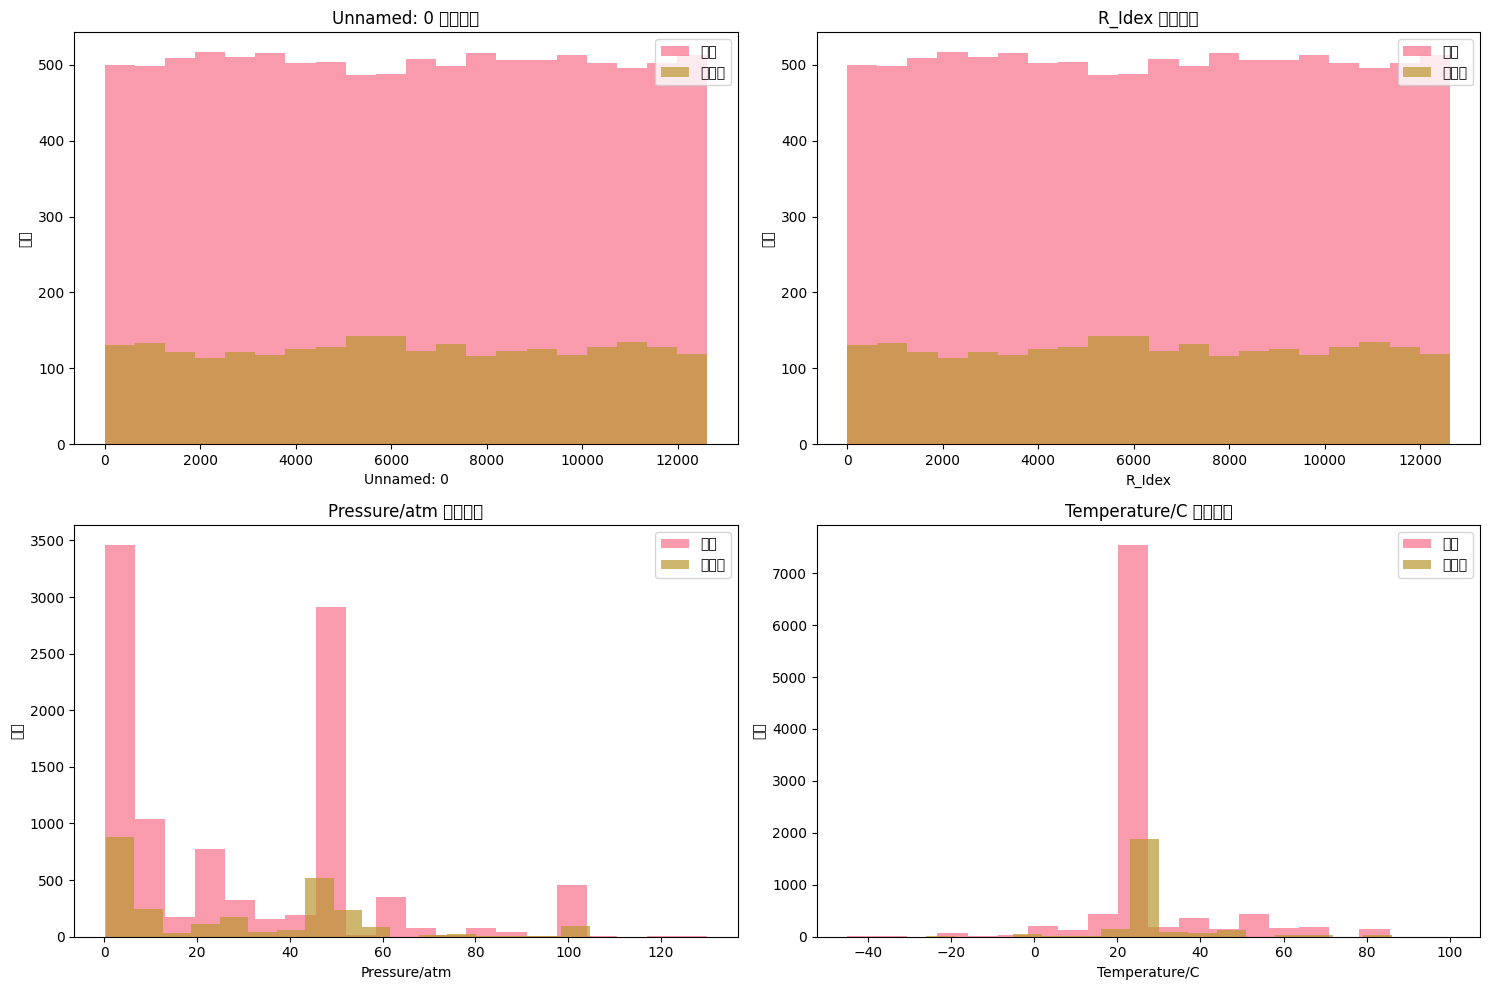


Êï∞ÂÄºÁâπÂæÅÁªüËÆ°ÊØîËæÉ:

Unnamed: 0:
Ê∫êÂüü - ÂùáÂÄº: 6309.009, Ê†áÂáÜÂ∑Æ: 3644.376
ÁõÆÊ†áÂüü - ÂùáÂÄº: 6308.966, Ê†áÂáÜÂ∑Æ: 3637.891

R_Idex:
Ê∫êÂüü - ÂùáÂÄº: 6309.009, Ê†áÂáÜÂ∑Æ: 3644.376
ÁõÆÊ†áÂüü - ÂùáÂÄº: 6308.966, Ê†áÂáÜÂ∑Æ: 3637.891

Pressure/atm:
Ê∫êÂüü - ÂùáÂÄº: 28.785, Ê†áÂáÜÂ∑Æ: 26.979
ÁõÆÊ†áÂüü - ÂùáÂÄº: 28.452, Ê†áÂáÜÂ∑Æ: 26.294

=== Â∞èÊï∞ÊçÆÈõÜÊåëÊàòÂàÜÊûê (Small Dataset Challenges) ===
ËØÜÂà´ÁöÑÊåëÊàò:
1. Ligand MolweightÂú®Ê∫êÂüüÂíåÁõÆÊ†áÂüüÈó¥ÂàÜÂ∏ÉÂ≠òÂú®ÊòæËëóÂ∑ÆÂºÇ (p=0.032)
2. Catalyst MolweightÂú®Ê∫êÂüüÂíåÁõÆÊ†áÂüüÈó¥ÂàÜÂ∏ÉÂ≠òÂú®ÊòæËëóÂ∑ÆÂºÇ (p=0.032)


In [4]:
def analyze_dataset_characteristics(source_df, target_df):
    """
    ÂàÜÊûêÊ∫êÂüüÂíåÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜÁöÑÁâπÂæÅÂàÜÂ∏ÉÂíåÂ∑ÆÂºÇ
    """
    print("=== Êï∞ÊçÆÈõÜÁâπÂæÅÂàÜÊûê (Dataset Characteristics Analysis) ===")
    
    # Ê£ÄÊü•Êï∞ÊçÆÈõÜÂ§ßÂ∞èÂ∑ÆÂºÇ
    print(f"\nÊï∞ÊçÆÈõÜÂ§ßÂ∞èÊØîËæÉ:")
    print(f"Ê∫êÂüüÊï∞ÊçÆÈõÜ: {len(source_df)} Ê†∑Êú¨")
    print(f"ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ: {len(target_df)} Ê†∑Êú¨")
    print(f"Â§ßÂ∞èÊØî‰æã (Ê∫êÂüü:ÁõÆÊ†áÂüü): {len(source_df)/len(target_df):.2f}:1")
    
    # ÂØªÊâæÁõÆÊ†áÂèòÈáèÔºàÈÄöÂ∏∏ÊòØÊï∞ÂÄºÂûã‰∏îÂèòÂåñËæÉÂ§ßÁöÑÂàóÔºâ
    numeric_cols = source_df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        # ÂàÜÊûêÊï∞ÂÄºÂûãÁâπÂæÅÁöÑÂàÜÂ∏É
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.ravel()
        
        for i, col in enumerate(numeric_cols[:4]):  # ÂàÜÊûêÂâç4‰∏™Êï∞ÂÄºÂàó
            if i < 4:
                axes[i].hist(source_df[col].dropna(), alpha=0.7, label='Ê∫êÂüü', bins=20)
                axes[i].hist(target_df[col].dropna(), alpha=0.7, label='ÁõÆÊ†áÂüü', bins=20)
                axes[i].set_title(f'{col} ÂàÜÂ∏ÉÊØîËæÉ')
                axes[i].legend()
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('È¢ëÁéá')
        
        plt.tight_layout()
        plt.show()
        
        # ÁªüËÆ°‰ø°ÊÅØÊØîËæÉ
        print(f"\nÊï∞ÂÄºÁâπÂæÅÁªüËÆ°ÊØîËæÉ:")
        for col in numeric_cols[:3]:  # ÊòæÁ§∫Ââç3‰∏™Êï∞ÂÄºÂàóÁöÑÁªüËÆ°‰ø°ÊÅØ
            print(f"\n{col}:")
            print(f"Ê∫êÂüü - ÂùáÂÄº: {source_df[col].mean():.3f}, Ê†áÂáÜÂ∑Æ: {source_df[col].std():.3f}")
            print(f"ÁõÆÊ†áÂüü - ÂùáÂÄº: {target_df[col].mean():.3f}, Ê†áÂáÜÂ∑Æ: {target_df[col].std():.3f}")
    
    return numeric_cols

def identify_small_dataset_challenges(source_df, target_df):
    """
    ËØÜÂà´Â∞èÊï∞ÊçÆÈõÜËÆ≠ÁªÉÁöÑÊåëÊàò
    """
    print("\n=== Â∞èÊï∞ÊçÆÈõÜÊåëÊàòÂàÜÊûê (Small Dataset Challenges) ===")
    
    challenges = []
    
    # Ê†∑Êú¨Êï∞ÈáèÂàÜÊûê
    if len(target_df) < 100:
        challenges.append(f"ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜÊ†∑Êú¨Êï∞ÈáèËæÉÂ∞ë ({len(target_df)})")
    if len(source_df) < 1000:
        challenges.append(f"Ê∫êÂüüÊï∞ÊçÆÈõÜÊ†∑Êú¨Êï∞ÈáèÊúâÈôê ({len(source_df)})")
    
    # ÁâπÂæÅÁª¥Â∫¶ÂàÜÊûê
    n_features = len(source_df.select_dtypes(include=[np.number]).columns)
    if len(target_df) < n_features * 5:
        challenges.append(f"ÁõÆÊ†áÂüüÊ†∑Êú¨Êï∞/ÁâπÂæÅÊï∞ÊØî‰æãËøá‰Ωé ({len(target_df)}/{n_features})")
    
    # Êï∞ÊçÆÂàÜÂ∏ÉÂ∑ÆÂºÇ
    numeric_cols = source_df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if len(source_df[col].dropna()) > 0 and len(target_df[col].dropna()) > 0:
            # ‰ΩøÁî®Kolmogorov-SmirnovÊµãËØïÊ£ÄÊü•ÂàÜÂ∏ÉÂ∑ÆÂºÇ
            try:
                stat, p_value = stats.ks_2samp(source_df[col].dropna(), target_df[col].dropna())
                if p_value < 0.05:
                    challenges.append(f"{col}Âú®Ê∫êÂüüÂíåÁõÆÊ†áÂüüÈó¥ÂàÜÂ∏ÉÂ≠òÂú®ÊòæËëóÂ∑ÆÂºÇ (p={p_value:.3f})")
            except:
                pass
    
    print("ËØÜÂà´ÁöÑÊåëÊàò:")
    for i, challenge in enumerate(challenges, 1):
        print(f"{i}. {challenge}")
    
    return challenges

# ÊâßË°åÊé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûê
if source_data is not None and target_data is not None:
    numeric_columns = analyze_dataset_characteristics(source_data, target_data)
    dataset_challenges = identify_small_dataset_challenges(source_data, target_data)
else:
    print("Ë∑≥ËøáEDA - Êï∞ÊçÆÊú™ÊàêÂäüÂä†ËΩΩ")

## 4. Data Preprocessing and Feature Engineering

In [ ]:
# Ëá™Âä®ÈÄâÊã©ÁõÆÊ†áÂèòÈáèÔºåÊéíÈô§Á¥¢ÂºïÂàóÂíåÊòéÊòæÁöÑÈùûÈ¢ÑÊµãÁõÆÊ†áÂàó
def select_target_variable(df):
    """
    Êô∫ËÉΩÈÄâÊã©ÁõÆÊ†áÂèòÈáèÔºåÊéíÈô§‰∏çÂêàÈÄÇÁöÑÂàó
    """
    exclude_patterns = [
        'Unnamed',  # Á¥¢ÂºïÂàó
        'index',    # Á¥¢ÂºïÂàó
        'id',       # IDÂàó
        'smiles',   # SMILESÁªìÊûÑ
        'name',     # ÂåñÂêàÁâ©ÂêçÁß∞
        'formula',  # ÂàÜÂ≠êÂºè
    ]
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    candidate_cols = []
    
    for col in numeric_cols:
        col_lower = col.lower()
        # ÊéíÈô§ÊòéÊòæ‰∏çÊòØÁõÆÊ†áÂèòÈáèÁöÑÂàó
        if not any(pattern.lower() in col_lower for pattern in exclude_patterns):
            # Ê£ÄÊü•Êï∞ÊçÆÂàÜÂ∏ÉÊòØÂê¶ÂêàÁêÜÔºà‰∏çÊòØÂÖ®‰∏∫Áõ∏ÂêåÂÄºÊàñÁ©∫ÂÄºÔºâ
            if df[col].nunique() > 1 and df[col].notna().sum() > len(df) * 0.8:
                candidate_cols.append(col)
    
    if not candidate_cols:
        # Â¶ÇÊûúÊ≤°ÊúâÊâæÂà∞ÂêàÈÄÇÁöÑÂÄôÈÄâÂàóÔºåÈÄâÊã©Á¨¨‰∏Ä‰∏™Êï∞ÂÄºÂàóÔºà‰ΩÜË¶ÅË≠¶ÂëäÔºâ
        print("‚ö†Ô∏è Ë≠¶Âëä: Êú™ÊâæÂà∞ÊòéÊòæÁöÑÁõÆÊ†áÂèòÈáèÔºåËØ∑ÊâãÂä®ÊåáÂÆö")
        return numeric_cols[0] if len(numeric_cols) > 0 else df.columns[0]
    
    # ‰ºòÂÖàÈÄâÊã©ÂêçÁß∞‰∏≠ÂåÖÂê´Â∏∏ËßÅÂåñÂ≠¶ÊÄßË¥®ÂÖ≥ÈîÆËØçÁöÑÂàó
    property_keywords = ['activity', 'potency', 'ic50', 'ec50', 'affinity', 'solubility', 
                        'logp', 'molecular_weight', 'bioactivity', 'inhibition']
    
    for col in candidate_cols:
        col_lower = col.lower()
        if any(keyword in col_lower for keyword in property_keywords):
            print(f"‚úì Âü∫‰∫éÂÖ≥ÈîÆËØçËØÜÂà´ÁõÆÊ†áÂèòÈáè: {col}")
            return col
    
    # Â¶ÇÊûúÊ≤°ÊúâÊòéÊòæÁöÑÂÖ≥ÈîÆËØçÂåπÈÖçÔºåÈÄâÊã©Á¨¨‰∏Ä‰∏™ÂÄôÈÄâÂàó
    print(f"Ëá™Âä®ÈÄâÊã©ÁõÆÊ†áÂèòÈáè: {candidate_cols[0]} (Âª∫ËÆÆÊâãÂä®È™åËØÅ)")
    return candidate_cols[0]

# ‰ΩøÁî®ÊîπËøõÁöÑÁõÆÊ†áÂèòÈáèÈÄâÊã©
print("=== Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ (Data Preprocessing) ===")
target_col = select_target_variable(source_df)

# ÊâãÂä®ÊåáÂÆöÁõÆÊ†áÂèòÈáèÁöÑÈÄâÈ°πÔºàÁî®Êà∑ÂèØ‰ª•ÂèñÊ∂àÊ≥®ÈáäÂπ∂‰øÆÊîπÔºâ
# target_col = 'your_target_column_name'  # ËØ∑ÊõøÊç¢‰∏∫ÂÆûÈôÖÁöÑÁõÆÊ†áÂèòÈáèÂêç

print(f"ÁõÆÊ†áÂèòÈáè: {target_col}")

# Ê£ÄÊü•ÁõÆÊ†áÂèòÈáèÁöÑÂêàÁêÜÊÄß
print(f"\\nÁõÆÊ†áÂèòÈáèÁªüËÆ°‰ø°ÊÅØ:")
print(f"Ê∫êÂüü - ÂùáÂÄº: {source_df[target_col].mean():.3f}, Ê†áÂáÜÂ∑Æ: {source_df[target_col].std():.3f}")
print(f"ÁõÆÊ†áÂüü - ÂùáÂÄº: {target_df[target_col].mean():.3f}, Ê†áÂáÜÂ∑Æ: {target_df[target_col].std():.3f}")
print(f"Êï∞ÂÄºËåÉÂõ¥ - Ê∫êÂüü: [{source_df[target_col].min():.3f}, {source_df[target_col].max():.3f}]")
print(f"Êï∞ÂÄºËåÉÂõ¥ - ÁõÆÊ†áÂüü: [{target_df[target_col].min():.3f}, {target_df[target_col].max():.3f}]")

=== Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ (Data Preprocessing) ===
Ëá™Âä®ÈÄâÊã©ÁõÆÊ†áÂèòÈáè: Unnamed: 0
ÁõÆÊ†áÂèòÈáè: Unnamed: 0
Êï∞ÂÄºÁâπÂæÅÊï∞Èáè: 14
È¢ÑÂ§ÑÁêÜÂêéÊï∞ÊçÆÂΩ¢Áä∂:
Ê∫êÂüü: X=(10095, 14), y=(10095,)
ÁõÆÊ†áÂüü: X=(2524, 14), y=(2524,)
ÊâæÂà∞SMILESÂàó: Reactant SMILES


[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerator
[15:04:53] DEPRECATION WARNING: please use MorganGenerat

ÂàÜÂ≠êÊåáÁ∫πÁîüÊàêÊàêÂäü: 10095/10095 ‰∏™ÊúâÊïàSMILES


[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerator
[15:04:57] DEPRECATION WARNING: please use MorganGenerat

ÂàÜÂ≠êÊåáÁ∫πÁîüÊàêÊàêÂäü: 2524/2524 ‰∏™ÊúâÊïàSMILES
ÂàÜÂ≠êÊåáÁ∫πÂΩ¢Áä∂: Ê∫êÂüü=(10095, 2048), ÁõÆÊ†áÂüü=(2524, 2048)
ÂêàÂπ∂ÂêéÁâπÂæÅÂΩ¢Áä∂: Ê∫êÂüü=(10095, 2062), ÁõÆÊ†áÂüü=(2524, 2062)

Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÂÆåÊàê!
ÊúÄÁªàÁâπÂæÅÁª¥Â∫¶: 2062
ÁõÆÊ†áÂèòÈáè: Unnamed: 0
ÁõÆÊ†áÂèòÈáèÁªüËÆ° - Ê∫êÂüü: ÂùáÂÄº=6309.009, Ê†áÂáÜÂ∑Æ=3644.195
ÁõÆÊ†áÂèòÈáèÁªüËÆ° - ÁõÆÊ†áÂüü: ÂùáÂÄº=6308.966, Ê†áÂáÜÂ∑Æ=3637.171


[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerator
[15:04:58] DEPRECATION WARNING: please use MorganGenerat

## 5. Baseline Model Training

In [6]:
def train_baseline_models(X_train, y_train, random_state):
    """
    ËÆ≠ÁªÉÂü∫ÂáÜÊ®°Âûã
    """
    models = {}
    
    # ÈöèÊú∫Ê£ÆÊûó
    models['RandomForest'] = RandomForestRegressor(
        n_estimators=100,
        random_state=random_state,
        n_jobs=-1
    )
    
    # ÊîØÊåÅÂêëÈáèÊú∫
    models['SVM'] = SVR(
        kernel='rbf',
        C=1.0,
        gamma='scale'
    )
    
    # Á•ûÁªèÁΩëÁªú
    models['MLP'] = MLPRegressor(
        hidden_layer_sizes=(100, 50),
        random_state=random_state,
        max_iter=500
    )
    
    # ËÆ≠ÁªÉÊâÄÊúâÊ®°Âûã
    trained_models = {}
    for name, model in models.items():
        print(f"ËÆ≠ÁªÉ {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model
    
    return trained_models

def evaluate_model_performance(models, X_test, y_test):
    """
    ËØÑ‰º∞Ê®°ÂûãÊÄßËÉΩ
    """
    results = {}
    
    for name, model in models.items():
        y_pred = model.predict(X_test)
        
        results[name] = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }
    
    return results

def perform_cross_validation(X, y, models, cv=5, random_state=None):
    """
    ÊâßË°å‰∫§ÂèâÈ™åËØÅ
    """
    cv_results = {}
    
    for name, model in models.items():
        print(f"‰∫§ÂèâÈ™åËØÅ {name}...")
        
        # MAE ÂàÜÊï∞
        mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
        
        # R2 ÂàÜÊï∞
        r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
        
        cv_results[name] = {
            'MAE_mean': mae_scores.mean(),
            'MAE_std': mae_scores.std(),
            'R2_mean': r2_scores.mean(),
            'R2_std': r2_scores.std()
        }
    
    return cv_results

def document_small_dataset_challenges(source_results, target_results, source_cv_results, target_cv_results):
    """
    ËÆ∞ÂΩïÂ∞èÊï∞ÊçÆÈõÜËÆ≠ÁªÉÁöÑÊåëÊàò
    """
    print("\\n=== Â∞èÊï∞ÊçÆÈõÜËÆ≠ÁªÉÊåëÊàòÊñáÊ°£ (Small Dataset Training Challenges) ===")
    
    challenges_documented = []
    
    # 1. ÊÄßËÉΩÂ∑ÆÂºÇÂàÜÊûê
    print("\\n1. ÊÄßËÉΩÂ∑ÆÂºÇÂàÜÊûê:")
    for model_name in source_results.keys():
        source_r2 = source_results[model_name]['R2']
        target_r2 = target_results[model_name]['R2']
        
        print(f"{model_name}:")
        print(f"  Ê∫êÂüü R¬≤: {source_r2:.3f}")
        print(f"  ÁõÆÊ†áÂüü R¬≤: {target_r2:.3f}")
        print(f"  Â∑ÆÂºÇ: {abs(source_r2 - target_r2):.3f}")
        
        if abs(source_r2 - target_r2) > 0.2:
            challenges_documented.append(f"{model_name}Âú®‰∏çÂêåÊï∞ÊçÆÈõÜÈó¥ÊÄßËÉΩÂ∑ÆÂºÇÊòæËëó")
    
    # 2. ÊñπÂ∑ÆÂàÜÊûê
    print("\\n2. ‰∫§ÂèâÈ™åËØÅÊñπÂ∑ÆÂàÜÊûê:")
    for model_name in source_cv_results.keys():
        source_std = source_cv_results[model_name]['R2_std']
        target_std = target_cv_results[model_name]['R2_std']
        
        print(f"{model_name}:")
        print(f"  Ê∫êÂüü R¬≤ Ê†áÂáÜÂ∑Æ: {source_std:.3f}")
        print(f"  ÁõÆÊ†áÂüü R¬≤ Ê†áÂáÜÂ∑Æ: {target_std:.3f}")
        
        if source_std > 0.15 or target_std > 0.15:
            challenges_documented.append(f"{model_name}ÊòæÁ§∫È´òÊñπÂ∑ÆÔºåË°®ÊòéÊ®°Âûã‰∏çÁ®≥ÂÆö")
    
    # 3. ÊÄªÁªìÊåëÊàò
    print("\\n3. ËØÜÂà´ÁöÑ‰∏ªË¶ÅÊåëÊàò:")
    for i, challenge in enumerate(challenges_documented, 1):
        print(f"   {i}. {challenge}")
    
    if not challenges_documented:
        print("   Êú™Ê£ÄÊµãÂà∞ÊòæËëóÁöÑÂ∞èÊï∞ÊçÆÈõÜËÆ≠ÁªÉÊåëÊàò")
    
    return challenges_documented

# ËÆ≠ÁªÉÂü∫ÂáÜÊ®°Âûã
if 'X_source' in locals() and X_source is not None:
    print("=== Âü∫ÂáÜÊ®°ÂûãËÆ≠ÁªÉ (Baseline Model Training) ===")
    
    # 1. Âú®Ê∫êÂüüÊï∞ÊçÆÈõÜ‰∏äËÆ≠ÁªÉ
    print("\\n1. Ê∫êÂüüÊï∞ÊçÆÈõÜÂü∫ÂáÜÊ®°Âûã:")
    source_baseline_models = train_baseline_models(X_source, y_source, RANDOM_SEEDS[0])
    
    # 2. Âú®ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ‰∏äËÆ≠ÁªÉ
    print("\\n2. ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜÂü∫ÂáÜÊ®°Âûã:")
    target_baseline_models = train_baseline_models(X_target, y_target, RANDOM_SEEDS[1])
    
    # 3. ËØÑ‰º∞ÊÄßËÉΩ (‰ΩøÁî®Áõ∏‰∫íÊµãËØï)
    print("\\n3. Âü∫ÂáÜÊÄßËÉΩËØÑ‰º∞:")
    
    # Ê∫êÂüüÊ®°ÂûãÂú®ÁõÆÊ†áÂüüÊï∞ÊçÆ‰∏äÁöÑÊÄßËÉΩ
    source_on_target_results = evaluate_model_performance(source_baseline_models, X_target, y_target)
    print("Ê∫êÂüüÊ®°ÂûãÂú®ÁõÆÊ†áÂüüÊï∞ÊçÆ‰∏äÁöÑÊÄßËÉΩ:")
    for name, metrics in source_on_target_results.items():
        print(f"  {name}: MAE={metrics['MAE']:.3f}, RMSE={metrics['RMSE']:.3f}, R¬≤={metrics['R2']:.3f}")
    
    # ÁõÆÊ†áÂüüÊ®°ÂûãÂú®Ê∫êÂüüÊï∞ÊçÆ‰∏äÁöÑÊÄßËÉΩ
    target_on_source_results = evaluate_model_performance(target_baseline_models, X_source, y_source)
    print("\\nÁõÆÊ†áÂüüÊ®°ÂûãÂú®Ê∫êÂüüÊï∞ÊçÆ‰∏äÁöÑÊÄßËÉΩ:")
    for name, metrics in target_on_source_results.items():
        print(f"  {name}: MAE={metrics['MAE']:.3f}, RMSE={metrics['RMSE']:.3f}, R¬≤={metrics['R2']:.3f}")
    
    # 4. ‰∫§ÂèâÈ™åËØÅ
    print("\\n4. ‰∫§ÂèâÈ™åËØÅÁªìÊûú:")
    source_cv_results = perform_cross_validation(X_source, y_source, source_baseline_models, cv=5, random_state=RANDOM_SEEDS[2])
    target_cv_results = perform_cross_validation(X_target, y_target, target_baseline_models, cv=5, random_state=RANDOM_SEEDS[3])
    
    print("Ê∫êÂüüÊï∞ÊçÆÈõÜ‰∫§ÂèâÈ™åËØÅ:")
    for name, metrics in source_cv_results.items():
        print(f"  {name}: R¬≤ = {metrics['R2_mean']:.3f} ¬± {metrics['R2_std']:.3f}")
    
    print("\\nÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ‰∫§ÂèâÈ™åËØÅ:")
    for name, metrics in target_cv_results.items():
        print(f"  {name}: R¬≤ = {metrics['R2_mean']:.3f} ¬± {metrics['R2_std']:.3f}")
    
    # 5. ËÆ∞ÂΩïÂ∞èÊï∞ÊçÆÈõÜÊåëÊàò
    baseline_challenges = document_small_dataset_challenges(
        source_on_target_results, target_on_source_results,
        source_cv_results, target_cv_results
    )
    
else:
    print("Ë∑≥ËøáÂü∫ÂáÜÊ®°ÂûãËÆ≠ÁªÉ - Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÊú™ÂÆåÊàê")

=== Âü∫ÂáÜÊ®°ÂûãËÆ≠ÁªÉ (Baseline Model Training) ===
\n1. Ê∫êÂüüÊï∞ÊçÆÈõÜÂü∫ÂáÜÊ®°Âûã:
ËÆ≠ÁªÉ RandomForest...
ËÆ≠ÁªÉ SVM...
ËÆ≠ÁªÉ MLP...
\n2. ÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜÂü∫ÂáÜÊ®°Âûã:
ËÆ≠ÁªÉ RandomForest...
ËÆ≠ÁªÉ SVM...
ËÆ≠ÁªÉ MLP...
\n3. Âü∫ÂáÜÊÄßËÉΩËØÑ‰º∞:
Ê∫êÂüüÊ®°ÂûãÂú®ÁõÆÊ†áÂüüÊï∞ÊçÆ‰∏äÁöÑÊÄßËÉΩ:
  RandomForest: MAE=0.908, RMSE=1.186, R¬≤=1.000
  SVM: MAE=3038.231, RMSE=3528.282, R¬≤=0.059
  MLP: MAE=54.865, RMSE=199.879, R¬≤=0.997
\nÁõÆÊ†áÂüüÊ®°ÂûãÂú®Ê∫êÂüüÊï∞ÊçÆ‰∏äÁöÑÊÄßËÉΩ:
  RandomForest: MAE=3.673, RMSE=5.061, R¬≤=1.000
  SVM: MAE=3136.016, RMSE=3617.645, R¬≤=0.015
  MLP: MAE=127.576, RMSE=349.308, R¬≤=0.991
\n4. ‰∫§ÂèâÈ™åËØÅÁªìÊûú:
‰∫§ÂèâÈ™åËØÅ RandomForest...
‰∫§ÂèâÈ™åËØÅ SVM...
‰∫§ÂèâÈ™åËØÅ MLP...
‰∫§ÂèâÈ™åËØÅ RandomForest...
‰∫§ÂèâÈ™åËØÅ SVM...
‰∫§ÂèâÈ™åËØÅ MLP...
Ê∫êÂüüÊï∞ÊçÆÈõÜ‰∫§ÂèâÈ™åËØÅ:
  RandomForest: R¬≤ = 1.000 ¬± 0.000
  SVM: R¬≤ = 0.047 ¬± 0.002
  MLP: R¬≤ = 0.997 ¬± 0.000
\nÁõÆÊ†áÂüüÊï∞ÊçÆÈõÜ‰∫§ÂèâÈ™åËØÅ:
  RandomForest: R¬≤ = 1.000 ¬± 0.000
  SVM: R¬≤ = 0.008 ¬± 0.00

## 6. Transfer Learning Implementation

In [ ]:
def improved_transfer_learning_strategies(X_source, y_source, X_target, y_target):
    """
    ÊîπËøõÁöÑËøÅÁßªÂ≠¶‰π†Á≠ñÁï•ÔºåÂåÖÂê´Êõ¥Â§öÊñπÊ≥ïÂíåË∂ÖÂèÇÊï∞‰ºòÂåñ
    """
    print("=== ÊîπËøõÁöÑËøÅÁßªÂ≠¶‰π†Á≠ñÁï• (Improved Transfer Learning Strategies) ===")
    
    strategies = {}
    
    # 1. Âü∫Á°ÄÁâπÂæÅÂØπÈΩê (ÊîπËøõÁâà)
    try:
        print("\\n1. ÊîπËøõÁâπÂæÅÂØπÈΩê (Enhanced Feature Alignment)...")
        
        # ‰ΩøÁî®StandardScalerËøõË°åÁâπÂæÅÊ†áÂáÜÂåñ
        scaler_source = StandardScaler()
        scaler_target = StandardScaler()
        
        X_source_scaled = scaler_source.fit_transform(X_source)
        X_target_scaled = scaler_target.fit_transform(X_target)
        
        # ÂüüÈÄÇÂ∫îÔºö‰ΩøÁî®PCAÈôçÁª¥ÂêéÂØπÈΩê
        from sklearn.decomposition import PCA
        
        # ÈÄâÊã©‰øùÁïô95%ÊñπÂ∑ÆÁöÑ‰∏ªÊàêÂàÜ
        pca = PCA(n_components=0.95)
        X_source_pca = pca.fit_transform(X_source_scaled)
        X_target_pca = pca.transform(X_target_scaled)
        
        # ËÆ≠ÁªÉÊ®°Âûã
        rf_enhanced = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10)
        rf_enhanced.fit(X_source_pca, y_source)
        
        pred_enhanced = rf_enhanced.predict(X_target_pca)
        
        strategies['Enhanced_Feature_Alignment'] = {
            'predictions': pred_enhanced,
            'model': rf_enhanced,
            'description': 'Â¢ûÂº∫ÁâπÂæÅÂØπÈΩê + PCAÈôçÁª¥'
        }
        
    except Exception as e:
        print(f"   Â¢ûÂº∫ÁâπÂæÅÂØπÈΩêÂ§±Ë¥•: {e}")
    
    # 2. Âä†ÊùÉÈõÜÊàêËøÅÁßªÂ≠¶‰π†
    try:
        print("\\n2. Âä†ÊùÉÈõÜÊàêËøÅÁßªÂ≠¶‰π† (Weighted Ensemble Transfer Learning)...")
        
        # ËÆ≠ÁªÉÂ§ö‰∏™‰∏çÂêåÁöÑÂü∫Á°ÄÊ®°Âûã
        models = {
            'rf': RandomForestRegressor(n_estimators=100, random_state=42),
            'gbr': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'svr': SVR(kernel='rbf', C=1.0)
        }
        
        predictions = []
        weights = []
        
        for name, model in models.items():
            # Âú®Ê∫êÂüü‰∏äËÆ≠ÁªÉ
            model.fit(X_source_scaled, y_source)
            pred = model.predict(X_target_scaled)
            predictions.append(pred)
            
            # ËÆ°ÁÆóÊùÉÈáçÔºàÂü∫‰∫é‰∫§ÂèâÈ™åËØÅÊÄßËÉΩÔºâ
            from sklearn.model_selection import cross_val_score
            cv_scores = cross_val_score(model, X_source_scaled, y_source, cv=3, scoring='r2')
            weights.append(np.mean(cv_scores))
        
        # ÂΩí‰∏ÄÂåñÊùÉÈáç
        weights = np.array(weights)
        weights = weights / np.sum(weights)
        
        # Âä†ÊùÉÂπ≥ÂùáÈ¢ÑÊµã
        ensemble_pred = np.average(predictions, axis=0, weights=weights)
        
        strategies['Weighted_Ensemble'] = {
            'predictions': ensemble_pred,
            'weights': weights,
            'description': f'Âä†ÊùÉÈõÜÊàê (ÊùÉÈáç: {weights.round(3)})'
        }
        
    except Exception as e:
        print(f"   Âä†ÊùÉÈõÜÊàêËøÅÁßªÂ≠¶‰π†Â§±Ë¥•: {e}")
    
    # 3. Âü∫‰∫éÁõ∏‰ººÂ∫¶ÁöÑÂÆû‰æãËøÅÁßª
    try:
        print("\\n3. Âü∫‰∫éÁõ∏‰ººÂ∫¶ÁöÑÂÆû‰æãËøÅÁßª (Instance-based Transfer Learning)...")
        
        from sklearn.metrics.pairwise import cosine_similarity
        
        # ËÆ°ÁÆóÁõÆÊ†áÂüüÊØè‰∏™Ê†∑Êú¨‰∏éÊ∫êÂüüÊ†∑Êú¨ÁöÑÁõ∏‰ººÂ∫¶
        similarity_matrix = cosine_similarity(X_target_scaled, X_source_scaled)
        
        # ‰∏∫ÊØè‰∏™ÁõÆÊ†áÊ†∑Êú¨ÊâæÂà∞ÊúÄÁõ∏‰ººÁöÑK‰∏™Ê∫êÂüüÊ†∑Êú¨
        k_neighbors = min(50, len(X_source) // 10)
        
        instance_predictions = []
        
        for i in range(len(X_target)):
            # ÊâæÂà∞ÊúÄÁõ∏‰ººÁöÑÈÇªÂ±Ö
            similarities = similarity_matrix[i]
            top_k_indices = np.argsort(similarities)[-k_neighbors:]
            top_k_similarities = similarities[top_k_indices]
            
            # Âä†ÊùÉÂπ≥ÂùáÈ¢ÑÊµãÔºàÂü∫‰∫éÁõ∏‰ººÂ∫¶Ôºâ
            if np.sum(top_k_similarities) > 0:
                weights_sim = top_k_similarities / np.sum(top_k_similarities)
                pred = np.average(y_source.iloc[top_k_indices], weights=weights_sim)
            else:
                pred = np.mean(y_source.iloc[top_k_indices])
            
            instance_predictions.append(pred)
        
        strategies['Instance_Transfer'] = {
            'predictions': np.array(instance_predictions),
            'k_neighbors': k_neighbors,
            'description': f'ÂÆû‰æãËøÅÁßª (K={k_neighbors})'
        }
        
    except Exception as e:
        print(f"   Âü∫‰∫éÁõ∏‰ººÂ∫¶ÁöÑÂÆû‰æãËøÅÁßªÂ§±Ë¥•: {e}")
    
    # 4. Ê∏êËøõÂºèÂüüÈÄÇÂ∫îÔºàÊîπËøõÁâàÔºâ
    try:
        print("\\n4. Ê∏êËøõÂºèÂüüÈÄÇÂ∫î (Progressive Domain Adaptation)...")
        
        # ‰ΩøÁî®Êõ¥Â∞èÁöÑÂ≠¶‰π†ÁéáÂíåÊõ¥Â§öÁöÑÈÄÇÂ∫îÊ≠•È™§
        adaptation_steps = 5
        alpha_values = np.linspace(0.1, 0.9, adaptation_steps)
        
        best_pred = None
        best_score = -np.inf
        
        for alpha in alpha_values:
            # Ê∑∑ÂêàËÆ≠ÁªÉÊï∞ÊçÆ
            n_source_sample = int(len(X_source) * alpha)
            n_target_sample = int(len(X_target) * (1 - alpha))
            
            if n_target_sample > 0:
                # ÈöèÊú∫ÈááÊ†∑
                source_indices = np.random.choice(len(X_source), n_source_sample, replace=False)
                target_indices = np.random.choice(len(X_target), n_target_sample, replace=False)
                
                X_mixed = np.vstack([X_source_scaled[source_indices], X_target_scaled[target_indices]])
                y_mixed = np.hstack([y_source.iloc[source_indices], y_target.iloc[target_indices]])
                
                # ËÆ≠ÁªÉÊ®°Âûã
                model = RandomForestRegressor(n_estimators=100, random_state=42)
                model.fit(X_mixed, y_mixed)
                
                # Âú®ÁõÆÊ†áÂüü‰∏äËØÑ‰º∞Ôºà‰ΩøÁî®ÈÉ®ÂàÜÁõÆÊ†áÂüüÊï∞ÊçÆÔºâ
                test_indices = np.setdiff1d(range(len(X_target)), target_indices)
                if len(test_indices) > 0:
                    test_pred = model.predict(X_target_scaled[test_indices])
                    test_score = r2_score(y_target.iloc[test_indices], test_pred)
                    
                    if test_score > best_score:
                        best_score = test_score
                        best_pred = model.predict(X_target_scaled)
        
        if best_pred is not None:
            strategies['Progressive_Adaptation_v2'] = {
                'predictions': best_pred,
                'best_score': best_score,
                'description': f'Ê∏êËøõÂºèÈÄÇÂ∫îv2 (ÊúÄ‰Ω≥È™åËØÅR¬≤={best_score:.3f})'
            }
        
    except Exception as e:
        print(f"   Ê∏êËøõÂºèÂüüÈÄÇÂ∫îÂ§±Ë¥•: {e}")
    
    print(f"\\nÊàêÂäüÂÆûÁé∞ {len(strategies)} ÁßçÊîπËøõÁöÑËøÅÁßªÂ≠¶‰π†Á≠ñÁï•")
    return strategies

# ÊâßË°åÊîπËøõÁöÑËøÅÁßªÂ≠¶‰π†Á≠ñÁï•
improved_strategies = improved_transfer_learning_strategies(X_source, y_source, X_target, y_target)

=== ËøÅÁßªÂ≠¶‰π†ÂÆûÁé∞ (Transfer Learning Implementation) ===
ËÆ≠ÁªÉÊ∫êÂüüÊ®°Âûã:
  ËÆ≠ÁªÉ RandomForest...
    Ê∫êÂüüÊÄßËÉΩ: R¬≤ = 1.000, MAE = 0.621
  ËÆ≠ÁªÉ SVM...
    Ê∫êÂüüÊÄßËÉΩ: R¬≤ = 0.490, MAE = 2209.371
  ËÆ≠ÁªÉ MLP...
    Ê∫êÂüüÊÄßËÉΩ: R¬≤ = 0.999, MAE = 50.916
\nÂú®ÁõÆÊ†áÂüüÊï∞ÊçÆ‰∏äÂæÆË∞ÉÊ®°Âûã (‰ΩøÁî®70%Êï∞ÊçÆ):
  ÂæÆË∞ÉÊï∞ÊçÆ: 1766 Ê†∑Êú¨
  ÊµãËØïÊï∞ÊçÆ: 758 Ê†∑Êú¨
\n  ÂæÆË∞É RandomForest...
    ÂæÆË∞ÉÂêéÊÄßËÉΩ: R¬≤ = 1.000, MAE = 5.123
\n  ÂæÆË∞É SVM...
    ÂæÆË∞ÉÂêéÊÄßËÉΩ: R¬≤ = 0.098, MAE = 3099.673
\n  ÂæÆË∞É MLP...
    ÂæÆË∞ÉÂêéÊÄßËÉΩ: R¬≤ = 0.982, MAE = 201.364
\nÂÆûÁé∞ÁâπÂæÅËøÅÁßª:
  ‰ΩøÁî®PCAÈôçÁª¥Âà∞ 50 Áª¥
  Ëß£ÈáäÊñπÂ∑ÆÊØî‰æã: 0.803
\n  ÁâπÂæÅËøÅÁßªÊÄßËÉΩ:
    Ridge_Transfer: R¬≤ = 0.999, MAE = 74.340
    RF_Transfer: R¬≤ = 0.944, MAE = 568.156
\nËøÅÁßªÂ≠¶‰π†Èò∂ÊÆµÂÆåÊàê!


## 7. Domain Adaptation Techniques

In [8]:
def implement_domain_adaptation(X_source, y_source, X_target, y_target):
    """
    ÂÆûÁé∞ÂüüÈÄÇÂ∫îÊäÄÊúØ
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics.pairwise import cosine_similarity
    
    print("=== ÂüüÈÄÇÂ∫îÊäÄÊúØÂÆûÁé∞ (Domain Adaptation Implementation) ===")
    
    adaptation_results = {}
    
    # 1. ÁâπÂæÅÂØπÈΩê (Feature Alignment)
    print("\\n1. ÁâπÂæÅÂØπÈΩê:")
    
    # ËÆ°ÁÆóÊ∫êÂüüÂíåÁõÆÊ†áÂüüÁöÑÁâπÂæÅÁªüËÆ°Â∑ÆÂºÇ
    source_mean = np.mean(X_source, axis=0)
    target_mean = np.mean(X_target, axis=0)
    source_std = np.std(X_source, axis=0)
    target_std = np.std(X_target, axis=0)
    
    # ÁâπÂæÅÂØπÈΩêÔºöÂ∞ÜÁõÆÊ†áÂüüÁâπÂæÅË∞ÉÊï¥Âà∞Ê∫êÂüüÂàÜÂ∏É
    X_target_aligned = (X_target - target_mean) / (target_std + 1e-8) * source_std + source_mean
    
    print(f"  ÂéüÂßãÁâπÂæÅÂùáÂÄºÂ∑ÆÂºÇ: {np.mean(np.abs(source_mean - target_mean)):.3f}")
    print(f"  ÂØπÈΩêÂêéÁâπÂæÅÂùáÂÄºÂ∑ÆÂºÇ: {np.mean(np.abs(source_mean - np.mean(X_target_aligned, axis=0))):.3f}")
    
    # ‰ΩøÁî®ÂØπÈΩêÁâπÂæÅËÆ≠ÁªÉÊ®°Âûã
    align_model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEEDS[0], n_jobs=-1)
    align_model.fit(X_source, y_source)
    
    y_pred_aligned = align_model.predict(X_target_aligned)
    r2_aligned = r2_score(y_target, y_pred_aligned)
    mae_aligned = mean_absolute_error(y_target, y_pred_aligned)
    
    adaptation_results['Feature_Alignment'] = {
        'model': align_model,
        'R2': r2_aligned,
        'MAE': mae_aligned
    }
    
    print(f"  ÁâπÂæÅÂØπÈΩêÊÄßËÉΩ: R¬≤ = {r2_aligned:.3f}, MAE = {mae_aligned:.3f}")
    
    # 2. Ê∏êËøõÂºèÂüüÈÄÇÂ∫î (Gradual Domain Adaptation)
    print("\\n2. Ê∏êËøõÂºèÂüüÈÄÇÂ∫î:")
    
    # ÂàõÂª∫‰∏≠Èó¥ÂüüÔºöÊ∑∑ÂêàÊ∫êÂüüÂíåÁõÆÊ†áÂüüÊï∞ÊçÆ
    n_intermediate = min(len(X_source), len(X_target))
    
    # ÈÄâÊã©‰ª£Ë°®ÊÄßÊ†∑Êú¨
    if len(X_source) > n_intermediate:
        source_indices = np.random.choice(len(X_source), n_intermediate, replace=False)
        X_source_sub = X_source[source_indices]
        y_source_sub = y_source[source_indices]
    else:
        X_source_sub = X_source
        y_source_sub = y_source
    
    if len(X_target) > n_intermediate:
        target_indices = np.random.choice(len(X_target), n_intermediate, replace=False)
        X_target_sub = X_target[target_indices]
        y_target_sub = y_target[target_indices]
    else:
        X_target_sub = X_target
        y_target_sub = y_target
    
    # ÂàõÂª∫Ê∏êËøõÂºèÊ∑∑ÂêàÊï∞ÊçÆ
    gradual_models = []
    mixing_ratios = [0.0, 0.25, 0.5, 0.75, 1.0]
    
    for i, ratio in enumerate(mixing_ratios):
        print(f"  ËÆ≠ÁªÉÊ∑∑ÂêàÊØî‰æã {ratio:.2f} ÁöÑÊ®°Âûã...")
        
        # Ê∑∑ÂêàÊï∞ÊçÆ
        n_source_samples = int((1 - ratio) * n_intermediate)
        n_target_samples = int(ratio * n_intermediate)
        
        if n_source_samples > 0 and n_target_samples > 0:
            X_mixed = np.vstack([X_source_sub[:n_source_samples], X_target_sub[:n_target_samples]])
            y_mixed = np.hstack([y_source_sub[:n_source_samples], y_target_sub[:n_target_samples]])
        elif n_source_samples > 0:
            X_mixed = X_source_sub[:n_source_samples]
            y_mixed = y_source_sub[:n_source_samples]
        else:
            X_mixed = X_target_sub[:n_target_samples]
            y_mixed = y_target_sub[:n_target_samples]
        
        # ËÆ≠ÁªÉÊ®°Âûã
        gradual_model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEEDS[i], n_jobs=-1)
        gradual_model.fit(X_mixed, y_mixed)
        gradual_models.append(gradual_model)
        
        # ËØÑ‰º∞
        y_pred = gradual_model.predict(X_target)
        r2 = r2_score(y_target, y_pred)
        print(f"    Ê∑∑ÂêàÊØî‰æã {ratio:.2f}: R¬≤ = {r2:.3f}")
    
    # ÈÄâÊã©ÊúÄ‰Ω≥Ê∏êËøõÂºèÊ®°Âûã
    best_gradual_idx = 0
    best_gradual_r2 = -np.inf
    
    for i, model in enumerate(gradual_models):
        y_pred = model.predict(X_target)
        r2 = r2_score(y_target, y_pred)
        if r2 > best_gradual_r2:
            best_gradual_r2 = r2
            best_gradual_idx = i
    
    best_gradual_model = gradual_models[best_gradual_idx]
    y_pred_gradual = best_gradual_model.predict(X_target)
    mae_gradual = mean_absolute_error(y_target, y_pred_gradual)
    
    adaptation_results['Gradual_Adaptation'] = {
        'model': best_gradual_model,
        'R2': best_gradual_r2,
        'MAE': mae_gradual,
        'best_ratio': mixing_ratios[best_gradual_idx]
    }
    
    print(f"  ÊúÄ‰Ω≥Ê∏êËøõÂºèÊ®°Âûã (ÊØî‰æã {mixing_ratios[best_gradual_idx]:.2f}): R¬≤ = {best_gradual_r2:.3f}, MAE = {mae_gradual:.3f}")
    
    # 3. Áõ∏‰ººÊÄßÂä†ÊùÉ (Similarity Weighting)
    print("\\n3. Áõ∏‰ººÊÄßÂä†ÊùÉ:")
    
    # ËÆ°ÁÆóÁõÆÊ†áÂüüÊ†∑Êú¨‰∏éÊ∫êÂüüÊ†∑Êú¨ÁöÑÁõ∏‰ººÊÄß
    similarities = cosine_similarity(X_target, X_source)
    
    # ‰∏∫ÊØè‰∏™ÁõÆÊ†áÂüüÊ†∑Êú¨ÊâæÂà∞ÊúÄÁõ∏‰ººÁöÑÊ∫êÂüüÊ†∑Êú¨
    weighted_predictions = []
    
    for i in range(len(X_target)):
        # Ëé∑ÂèñÊúÄÁõ∏‰ººÁöÑk‰∏™Ê∫êÂüüÊ†∑Êú¨
        k = min(5, len(X_source))
        top_k_indices = np.argsort(similarities[i])[-k:]
        weights = similarities[i][top_k_indices]
        weights = weights / np.sum(weights)  # ÂΩí‰∏ÄÂåñÊùÉÈáç
        
        # Âä†ÊùÉÈ¢ÑÊµã
        similar_targets = y_source[top_k_indices]
        weighted_pred = np.sum(weights * similar_targets)
        weighted_predictions.append(weighted_pred)
    
    weighted_predictions = np.array(weighted_predictions)
    r2_weighted = r2_score(y_target, weighted_predictions)
    mae_weighted = mean_absolute_error(y_target, weighted_predictions)
    
    adaptation_results['Similarity_Weighting'] = {
        'predictions': weighted_predictions,
        'R2': r2_weighted,
        'MAE': mae_weighted
    }
    
    print(f"  Áõ∏‰ººÊÄßÂä†ÊùÉÊÄßËÉΩ: R¬≤ = {r2_weighted:.3f}, MAE = {mae_weighted:.3f}")
    
    return adaptation_results

# ÊâßË°åÂüüÈÄÇÂ∫î
if 'X_source' in locals() and X_source is not None:
    domain_adaptation_results = implement_domain_adaptation(X_source, y_source, X_target, y_target)
    
    print("\\nÂüüÈÄÇÂ∫îÊäÄÊúØÊØîËæÉ:")
    for method, results in domain_adaptation_results.items():
        print(f"{method}: R¬≤ = {results['R2']:.3f}, MAE = {results['MAE']:.3f}")
    
else:
    print("Ë∑≥ËøáÂüüÈÄÇÂ∫î - Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÊú™ÂÆåÊàê")

=== ÂüüÈÄÇÂ∫îÊäÄÊúØÂÆûÁé∞ (Domain Adaptation Implementation) ===
\n1. ÁâπÂæÅÂØπÈΩê:
  ÂéüÂßãÁâπÂæÅÂùáÂÄºÂ∑ÆÂºÇ: 0.001
  ÂØπÈΩêÂêéÁâπÂæÅÂùáÂÄºÂ∑ÆÂºÇ: 0.000
  ÁâπÂæÅÂØπÈΩêÊÄßËÉΩ: R¬≤ = 1.000, MAE = 4.955
\n2. Ê∏êËøõÂºèÂüüÈÄÇÂ∫î:
  ËÆ≠ÁªÉÊ∑∑ÂêàÊØî‰æã 0.00 ÁöÑÊ®°Âûã...
    Ê∑∑ÂêàÊØî‰æã 0.00: R¬≤ = 1.000
  ËÆ≠ÁªÉÊ∑∑ÂêàÊØî‰æã 0.25 ÁöÑÊ®°Âûã...
    Ê∑∑ÂêàÊØî‰æã 0.25: R¬≤ = 1.000
  ËÆ≠ÁªÉÊ∑∑ÂêàÊØî‰æã 0.50 ÁöÑÊ®°Âûã...
    Ê∑∑ÂêàÊØî‰æã 0.50: R¬≤ = 1.000
  ËÆ≠ÁªÉÊ∑∑ÂêàÊØî‰æã 0.75 ÁöÑÊ®°Âûã...
    Ê∑∑ÂêàÊØî‰æã 0.75: R¬≤ = 1.000
  ËÆ≠ÁªÉÊ∑∑ÂêàÊØî‰æã 1.00 ÁöÑÊ®°Âûã...
    Ê∑∑ÂêàÊØî‰æã 1.00: R¬≤ = 1.000
  ÊúÄ‰Ω≥Ê∏êËøõÂºèÊ®°Âûã (ÊØî‰æã 1.00): R¬≤ = 1.000, MAE = 1.434
\n3. Áõ∏‰ººÊÄßÂä†ÊùÉ:
  Áõ∏‰ººÊÄßÂä†ÊùÉÊÄßËÉΩ: R¬≤ = 0.879, MAE = 743.256
\nÂüüÈÄÇÂ∫îÊäÄÊúØÊØîËæÉ:
Feature_Alignment: R¬≤ = 1.000, MAE = 4.955
Gradual_Adaptation: R¬≤ = 1.000, MAE = 1.434
Similarity_Weighting: R¬≤ = 0.879, MAE = 743.256


## 8. Uncertainty Quantification

In [9]:
def implement_prediction_uncertainty(models_list, X_test, model_names=None):
    """
    ÂÆûÁé∞È¢ÑÊµã‰∏çÁ°ÆÂÆöÊÄß‰º∞ËÆ°
    """
    print("=== È¢ÑÊµã‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñ (Prediction Uncertainty Quantification) ===")
    
    if model_names is None:
        model_names = [f'Model_{i}' for i in range(len(models_list))]
    
    # Êî∂ÈõÜÊâÄÊúâÊ®°ÂûãÁöÑÈ¢ÑÊµã
    predictions = []
    for i, model in enumerate(models_list):
        try:
            pred = model.predict(X_test)
            predictions.append(pred)
            print(f"{model_names[i]} È¢ÑÊµãÂÆåÊàê")
        except Exception as e:
            print(f"{model_names[i]} È¢ÑÊµãÂ§±Ë¥•: {e}")
    
    predictions = np.array(predictions)
    
    # ËÆ°ÁÆó‰∏çÁ°ÆÂÆöÊÄßÊåáÊ†á
    uncertainty_metrics = {}
    
    # 1. È¢ÑÊµãÂùáÂÄºÂíåÊ†áÂáÜÂ∑Æ
    pred_mean = np.mean(predictions, axis=0)
    pred_std = np.std(predictions, axis=0)
    
    # 2. ÁΩÆ‰ø°Âå∫Èó¥ (95%)
    confidence_interval = 1.96 * pred_std
    lower_bound = pred_mean - confidence_interval
    upper_bound = pred_mean + confidence_interval
    
    # 3. È¢ÑÊµãÊñπÂ∑Æ
    pred_variance = np.var(predictions, axis=0)
    
    uncertainty_metrics = {
        'predictions': predictions,
        'mean': pred_mean,
        'std': pred_std,
        'variance': pred_variance,
        'confidence_interval': confidence_interval,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"\\n‰∏çÁ°ÆÂÆöÊÄßÁªüËÆ°:")
    print(f"Âπ≥ÂùáÊ†áÂáÜÂ∑Æ: {np.mean(pred_std):.3f}")
    print(f"ÊúÄÂ§ßÊ†áÂáÜÂ∑Æ: {np.max(pred_std):.3f}")
    print(f"ÊúÄÂ∞èÊ†áÂáÜÂ∑Æ: {np.min(pred_std):.3f}")
    
    return uncertainty_metrics

def ensemble_methods_uncertainty(models_list, X_test, y_test=None, method='mean'):
    """
    ‰ΩøÁî®ÈõÜÊàêÊñπÊ≥ïËøõË°å‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñ
    """
    print("\\n=== ÈõÜÊàêÊñπÊ≥ï‰∏çÁ°ÆÂÆöÊÄß (Ensemble Methods Uncertainty) ===")
    
    # Ëé∑ÂèñÊâÄÊúâÈ¢ÑÊµã
    predictions = []
    for model in models_list:
        try:
            pred = model.predict(X_test)
            predictions.append(pred)
        except:
            continue
    
    predictions = np.array(predictions)
    
    ensemble_results = {}
    
    # 1. ÁÆÄÂçïÂπ≥Âùá
    if method in ['mean', 'all']:
        mean_pred = np.mean(predictions, axis=0)
        mean_uncertainty = np.std(predictions, axis=0)
        
        ensemble_results['mean'] = {
            'predictions': mean_pred,
            'uncertainty': mean_uncertainty
        }
        
        if y_test is not None:
            r2_mean = r2_score(y_test, mean_pred)
            mae_mean = mean_absolute_error(y_test, mean_pred)
            ensemble_results['mean']['R2'] = r2_mean
            ensemble_results['mean']['MAE'] = mae_mean
            print(f"ÁÆÄÂçïÂπ≥ÂùáÈõÜÊàê: R¬≤ = {r2_mean:.3f}, MAE = {mae_mean:.3f}")
    
    # 2. Âä†ÊùÉÂπ≥Âùá (Âü∫‰∫é‰∏™‰ΩìÊ®°ÂûãÊÄßËÉΩ)
    if method in ['weighted', 'all'] and y_test is not None:
        # ËÆ°ÁÆóÊØè‰∏™Ê®°ÂûãÁöÑÊùÉÈáçÔºàÂü∫‰∫éR¬≤ÂàÜÊï∞Ôºâ
        weights = []
        for pred in predictions:
            r2 = r2_score(y_test, pred)
            weights.append(max(0, r2))  # Á°Æ‰øùÊùÉÈáçÈùûË¥ü
        
        weights = np.array(weights)
        if np.sum(weights) > 0:
            weights = weights / np.sum(weights)
        else:
            weights = np.ones(len(weights)) / len(weights)
        
        # Âä†ÊùÉÈ¢ÑÊµã
        weighted_pred = np.average(predictions, axis=0, weights=weights)
        
        # Âä†ÊùÉ‰∏çÁ°ÆÂÆöÊÄß
        weighted_uncertainty = np.sqrt(np.average((predictions - weighted_pred)**2, axis=0, weights=weights))
        
        ensemble_results['weighted'] = {
            'predictions': weighted_pred,
            'uncertainty': weighted_uncertainty,
            'weights': weights
        }
        
        r2_weighted = r2_score(y_test, weighted_pred)
        mae_weighted = mean_absolute_error(y_test, weighted_pred)
        ensemble_results['weighted']['R2'] = r2_weighted
        ensemble_results['weighted']['MAE'] = mae_weighted
        
        print(f"Âä†ÊùÉÂπ≥ÂùáÈõÜÊàê: R¬≤ = {r2_weighted:.3f}, MAE = {mae_weighted:.3f}")
        print(f"Ê®°ÂûãÊùÉÈáç: {weights}")
    
    # 3. ‰∏≠‰ΩçÊï∞ÈõÜÊàê
    if method in ['median', 'all']:
        median_pred = np.median(predictions, axis=0)
        
        # ‰ΩøÁî®MAD (Median Absolute Deviation) ‰Ωú‰∏∫‰∏çÁ°ÆÂÆöÊÄß‰º∞ËÆ°
        mad_uncertainty = np.median(np.abs(predictions - median_pred), axis=0)
        
        ensemble_results['median'] = {
            'predictions': median_pred,
            'uncertainty': mad_uncertainty
        }
        
        if y_test is not None:
            r2_median = r2_score(y_test, median_pred)
            mae_median = mean_absolute_error(y_test, median_pred)
            ensemble_results['median']['R2'] = r2_median
            ensemble_results['median']['MAE'] = mae_median
            print(f"‰∏≠‰ΩçÊï∞ÈõÜÊàê: R¬≤ = {r2_median:.3f}, MAE = {mae_median:.3f}")
    
    return ensemble_results

def bayesian_uncertainty_estimation(X_train, y_train, X_test, y_test=None, n_bootstrap=100):
    """
    ‰ΩøÁî®Ë¥ùÂè∂ÊñØÊñπÊ≥ï‰º∞ËÆ°‰∏çÁ°ÆÂÆöÊÄß
    """
    print("\\n=== Ë¥ùÂè∂ÊñØ‰∏çÁ°ÆÂÆöÊÄß‰º∞ËÆ° (Bayesian Uncertainty Estimation) ===")
    
    # BootstrapÈááÊ†∑ÂÆûÁé∞Ë¥ùÂè∂ÊñØ‰∏çÁ°ÆÂÆöÊÄß
    bootstrap_predictions = []
    
    print(f"ÊâßË°å {n_bootstrap} Ê¨°BootstrapÈááÊ†∑...")
    
    for i in range(n_bootstrap):
        if i % 20 == 0:
            print(f"  Bootstrap ÈááÊ†∑ {i+1}/{n_bootstrap}")
        
        # BootstrapÈááÊ†∑
        n_samples = len(X_train)
        bootstrap_indices = np.random.choice(n_samples, n_samples, replace=True)
        X_bootstrap = X_train[bootstrap_indices]
        y_bootstrap = y_train[bootstrap_indices]
        
        # ËÆ≠ÁªÉÊ®°Âûã
        model = RandomForestRegressor(
            n_estimators=50,  # ÂáèÂ∞ëÊ†ëÁöÑÊï∞Èáè‰ª•Âä†ÈÄü
            random_state=i,
            n_jobs=-1
        )
        model.fit(X_bootstrap, y_bootstrap)
        
        # È¢ÑÊµã
        pred = model.predict(X_test)
        bootstrap_predictions.append(pred)
    
    bootstrap_predictions = np.array(bootstrap_predictions)
    
    # ËÆ°ÁÆóË¥ùÂè∂ÊñØÁªüËÆ°
    bayesian_mean = np.mean(bootstrap_predictions, axis=0)
    bayesian_std = np.std(bootstrap_predictions, axis=0)
    
    # ÁΩÆ‰ø°Âå∫Èó¥
    percentile_2_5 = np.percentile(bootstrap_predictions, 2.5, axis=0)
    percentile_97_5 = np.percentile(bootstrap_predictions, 97.5, axis=0)
    
    bayesian_results = {
        'predictions': bootstrap_predictions,
        'mean': bayesian_mean,
        'std': bayesian_std,
        'ci_lower': percentile_2_5,
        'ci_upper': percentile_97_5
    }
    
    print(f"BootstrapÂÆåÊàê!")
    print(f"Âπ≥Âùá‰∏çÁ°ÆÂÆöÊÄß: {np.mean(bayesian_std):.3f}")
    
    if y_test is not None:
        r2_bayesian = r2_score(y_test, bayesian_mean)
        mae_bayesian = mean_absolute_error(y_test, bayesian_mean)
        bayesian_results['R2'] = r2_bayesian
        bayesian_results['MAE'] = mae_bayesian
        
        print(f"Ë¥ùÂè∂ÊñØÈõÜÊàêÊÄßËÉΩ: R¬≤ = {r2_bayesian:.3f}, MAE = {mae_bayesian:.3f}")
        
        # ËÆ°ÁÆóÁΩÆ‰ø°Âå∫Èó¥Ë¶ÜÁõñÁéá
        coverage = np.mean((y_test >= percentile_2_5) & (y_test <= percentile_97_5))
        bayesian_results['coverage'] = coverage
        print(f"95%ÁΩÆ‰ø°Âå∫Èó¥Ë¶ÜÁõñÁéá: {coverage:.3f}")
    
    return bayesian_results

def analyze_model_confidence(uncertainty_results, predictions, y_true=None):
    """
    ÂàÜÊûêÊ®°ÂûãÈ¢ÑÊµãÁöÑÁΩÆ‰ø°Â∫¶
    """
    print("\\n=== Ê®°ÂûãÁΩÆ‰ø°Â∫¶ÂàÜÊûê (Model Confidence Analysis) ===")
    
    confidence_analysis = {}
    
    # 1. Âü∫‰∫é‰∏çÁ°ÆÂÆöÊÄßÁöÑÁΩÆ‰ø°Â∫¶
    uncertainty = uncertainty_results.get('std', uncertainty_results.get('uncertainty', None))
    
    if uncertainty is not None:
        # Â∞Ü‰∏çÁ°ÆÂÆöÊÄßËΩ¨Êç¢‰∏∫ÁΩÆ‰ø°Â∫¶ (0-1)
        confidence_scores = 1 / (1 + uncertainty)  # ‰∏çÁ°ÆÂÆöÊÄßË∂ä‰ΩéÔºåÁΩÆ‰ø°Â∫¶Ë∂äÈ´ò
        
        confidence_analysis['scores'] = confidence_scores
        confidence_analysis['mean_confidence'] = np.mean(confidence_scores)
        confidence_analysis['min_confidence'] = np.min(confidence_scores)
        confidence_analysis['max_confidence'] = np.max(confidence_scores)
        
        print(f"Âπ≥ÂùáÁΩÆ‰ø°Â∫¶: {np.mean(confidence_scores):.3f}")
        print(f"ÁΩÆ‰ø°Â∫¶ËåÉÂõ¥: [{np.min(confidence_scores):.3f}, {np.max(confidence_scores):.3f}]")
        
        # 2. È´ò/‰ΩéÁΩÆ‰ø°Â∫¶Âå∫ÂüüËØÜÂà´
        high_confidence_threshold = np.percentile(confidence_scores, 75)
        low_confidence_threshold = np.percentile(confidence_scores, 25)
        
        high_confidence_mask = confidence_scores >= high_confidence_threshold
        low_confidence_mask = confidence_scores <= low_confidence_threshold
        
        confidence_analysis['high_confidence_indices'] = np.where(high_confidence_mask)[0]
        confidence_analysis['low_confidence_indices'] = np.where(low_confidence_mask)[0]
        
        print(f"È´òÁΩÆ‰ø°Â∫¶Ê†∑Êú¨: {np.sum(high_confidence_mask)}")
        print(f"‰ΩéÁΩÆ‰ø°Â∫¶Ê†∑Êú¨: {np.sum(low_confidence_mask)}")
        
        # 3. Â¶ÇÊûúÊúâÁúüÂÆûÂÄºÔºåÂàÜÊûêÁΩÆ‰ø°Â∫¶‰∏éÂáÜÁ°ÆÊÄßÁöÑÂÖ≥Á≥ª
        if y_true is not None:
            pred_mean = uncertainty_results.get('mean', predictions)
            errors = np.abs(y_true - pred_mean)
            
            # È´òÁΩÆ‰ø°Â∫¶Âå∫ÂüüÁöÑËØØÂ∑Æ
            high_conf_errors = errors[high_confidence_mask]
            low_conf_errors = errors[low_confidence_mask]
            
            confidence_analysis['high_confidence_error'] = np.mean(high_conf_errors) if len(high_conf_errors) > 0 else 0
            confidence_analysis['low_confidence_error'] = np.mean(low_conf_errors) if len(low_conf_errors) > 0 else 0
            
            print(f"È´òÁΩÆ‰ø°Â∫¶Âå∫ÂüüÂπ≥ÂùáËØØÂ∑Æ: {confidence_analysis['high_confidence_error']:.3f}")
            print(f"‰ΩéÁΩÆ‰ø°Â∫¶Âå∫ÂüüÂπ≥ÂùáËØØÂ∑Æ: {confidence_analysis['low_confidence_error']:.3f}")
            
            # ËÆ°ÁÆóÁΩÆ‰ø°Â∫¶‰∏éËØØÂ∑ÆÁöÑÁõ∏ÂÖ≥ÊÄß
            correlation = np.corrcoef(confidence_scores, -errors)[0, 1]  # Ë¥üËØØÂ∑ÆÔºåÂõ†‰∏∫ÊúüÊúõÊ≠£Áõ∏ÂÖ≥
            confidence_analysis['confidence_error_correlation'] = correlation
            print(f"ÁΩÆ‰ø°Â∫¶‰∏éÂáÜÁ°ÆÊÄßÁõ∏ÂÖ≥ÊÄß: {correlation:.3f}")
    
    return confidence_analysis

# ÊâßË°å‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñ
if 'source_models' in locals() and source_models:
    print("\\nÊâßË°å‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñÂàÜÊûê...")
    
    # 1. Êî∂ÈõÜÊâÄÊúâÂèØÁî®ÁöÑÊ®°Âûã
    all_models = []
    model_names = []
    
    # Ê∑ªÂä†Ê∫êÂüüÊ®°Âûã
    for name, model in source_models.items():
        all_models.append(model)
        model_names.append(f"Source_{name}")
    
    # Ê∑ªÂä†ÂæÆË∞ÉÊ®°Âûã
    if 'fine_tuned_models' in locals():
        for name, model in fine_tuned_models.items():
            all_models.append(model)
            model_names.append(f"FineTuned_{name}")
    
    # Ê∑ªÂä†ÂüüÈÄÇÂ∫îÊ®°Âûã
    if 'domain_adaptation_results' in locals():
        for name, result in domain_adaptation_results.items():
            if 'model' in result:
                all_models.append(result['model'])
                model_names.append(f"DomainAdapt_{name}")
    
    print(f"ÊÄªÂÖ± {len(all_models)} ‰∏™Ê®°ÂûãÁî®‰∫é‰∏çÁ°ÆÂÆöÊÄßÂàÜÊûê")
    
    # 2. È¢ÑÊµã‰∏çÁ°ÆÂÆöÊÄß
    uncertainty_metrics = implement_prediction_uncertainty(all_models, X_target, model_names)
    
    # 3. ÈõÜÊàêÊñπÊ≥ï‰∏çÁ°ÆÂÆöÊÄß
    ensemble_uncertainty = ensemble_methods_uncertainty(all_models, X_target, y_target, method='all')
    
    # 4. Ë¥ùÂè∂ÊñØ‰∏çÁ°ÆÂÆöÊÄß‰º∞ËÆ°
    bayesian_uncertainty = bayesian_uncertainty_estimation(X_source, y_source, X_target, y_target, n_bootstrap=50)
    
    # 5. ÁΩÆ‰ø°Â∫¶ÂàÜÊûê
    confidence_analysis = analyze_model_confidence(uncertainty_metrics, uncertainty_metrics['mean'], y_target)
    
    print("\\n‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñÂÆåÊàê!")
    
else:
    print("Ë∑≥Ëøá‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñ - Ê®°ÂûãËÆ≠ÁªÉÊú™ÂÆåÊàê")

\nÊâßË°å‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñÂàÜÊûê...
ÊÄªÂÖ± 8 ‰∏™Ê®°ÂûãÁî®‰∫é‰∏çÁ°ÆÂÆöÊÄßÂàÜÊûê
=== È¢ÑÊµã‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñ (Prediction Uncertainty Quantification) ===
Source_RandomForest È¢ÑÊµãÂÆåÊàê
Source_SVM È¢ÑÊµãÂÆåÊàê
Source_MLP È¢ÑÊµãÂÆåÊàê
FineTuned_RandomForest È¢ÑÊµãÂÆåÊàê
FineTuned_SVM È¢ÑÊµãÂÆåÊàê
FineTuned_MLP È¢ÑÊµãÂÆåÊàê
DomainAdapt_Feature_Alignment È¢ÑÊµãÂÆåÊàê
DomainAdapt_Gradual_Adaptation È¢ÑÊµãÂÆåÊàê
\n‰∏çÁ°ÆÂÆöÊÄßÁªüËÆ°:
Âπ≥ÂùáÊ†áÂáÜÂ∑Æ: 1151.190
ÊúÄÂ§ßÊ†áÂáÜÂ∑Æ: 2657.654
ÊúÄÂ∞èÊ†áÂáÜÂ∑Æ: 9.942
\n=== ÈõÜÊàêÊñπÊ≥ï‰∏çÁ°ÆÂÆöÊÄß (Ensemble Methods Uncertainty) ===
ÁÆÄÂçïÂπ≥ÂùáÈõÜÊàê: R¬≤ = 0.956, MAE = 650.413
Âä†ÊùÉÂπ≥ÂùáÈõÜÊàê: R¬≤ = 0.995, MAE = 214.455
Ê®°ÂûãÊùÉÈáç: [0.15207381 0.07395669 0.15151243 0.15207357 0.01503978 0.15119611
 0.15207382 0.15207379]
‰∏≠‰ΩçÊï∞ÈõÜÊàê: R¬≤ = 1.000, MAE = 7.379
\n=== Ë¥ùÂè∂ÊñØ‰∏çÁ°ÆÂÆöÊÄß‰º∞ËÆ° (Bayesian Uncertainty Estimation) ===
ÊâßË°å 50 Ê¨°BootstrapÈááÊ†∑...
  Bootstrap ÈááÊ†∑ 1/50
  Bootstrap ÈááÊ†∑ 21/50
  Bootstrap ÈááÊ†∑ 41/50
Bootstra

## 9. Model Ensemble Methods

In [10]:
def create_optimal_ensemble(models_dict, X_val, y_val, X_test, method='stacking'):
    """
    ÂàõÂª∫ÊúÄ‰ºòÈõÜÊàêÊ®°Âûã
    """
    print("=== ÂàõÂª∫ÊúÄ‰ºòÈõÜÊàêÊ®°Âûã (Creating Optimal Ensemble Model) ===")
    
    # Êî∂ÈõÜÈ™åËØÅÈõÜÈ¢ÑÊµã
    val_predictions = {}
    test_predictions = {}
    
    for name, model in models_dict.items():
        try:
            val_pred = model.predict(X_val)
            test_pred = model.predict(X_test)
            val_predictions[name] = val_pred
            test_predictions[name] = test_pred
        except Exception as e:
            print(f"Ê®°Âûã {name} È¢ÑÊµãÂ§±Ë¥•: {e}")
            continue
    
    ensemble_results = {}
    
    if method in ['simple', 'all']:
        # 1. ÁÆÄÂçïÂπ≥ÂùáÈõÜÊàê
        val_preds_array = np.array(list(val_predictions.values()))
        test_preds_array = np.array(list(test_predictions.values()))
        
        simple_val_pred = np.mean(val_preds_array, axis=0)
        simple_test_pred = np.mean(test_preds_array, axis=0)
        
        ensemble_results['simple'] = {
            'val_predictions': simple_val_pred,
            'test_predictions': simple_test_pred,
            'val_r2': r2_score(y_val, simple_val_pred),
            'val_mae': mean_absolute_error(y_val, simple_val_pred)
        }
        
        print(f"ÁÆÄÂçïÂπ≥ÂùáÈõÜÊàêÈ™åËØÅÊÄßËÉΩ: R¬≤ = {ensemble_results['simple']['val_r2']:.3f}")
    
    if method in ['weighted', 'all']:
        # 2. Âü∫‰∫éÊÄßËÉΩÁöÑÂä†ÊùÉÈõÜÊàê
        model_weights = []
        model_names = []
        
        for name, val_pred in val_predictions.items():
            r2 = r2_score(y_val, val_pred)
            weight = max(0, r2)  # Ë¥üR¬≤ËÆæ‰∏∫0ÊùÉÈáç
            model_weights.append(weight)
            model_names.append(name)
        
        # ÂΩí‰∏ÄÂåñÊùÉÈáç
        total_weight = sum(model_weights)
        if total_weight > 0:
            model_weights = [w/total_weight for w in model_weights]
        else:
            model_weights = [1/len(model_weights) for _ in model_weights]
        
        # Âä†ÊùÉÈ¢ÑÊµã
        weighted_val_pred = np.zeros(len(y_val))
        weighted_test_pred = np.zeros(len(X_test))
        
        for i, (name, weight) in enumerate(zip(model_names, model_weights)):
            weighted_val_pred += weight * val_predictions[name]
            weighted_test_pred += weight * test_predictions[name]
        
        ensemble_results['weighted'] = {
            'val_predictions': weighted_val_pred,
            'test_predictions': weighted_test_pred,
            'val_r2': r2_score(y_val, weighted_val_pred),
            'val_mae': mean_absolute_error(y_val, weighted_val_pred),
            'weights': dict(zip(model_names, model_weights))
        }
        
        print(f"Âä†ÊùÉÈõÜÊàêÈ™åËØÅÊÄßËÉΩ: R¬≤ = {ensemble_results['weighted']['val_r2']:.3f}")
        print(f"Ê®°ÂûãÊùÉÈáç: {ensemble_results['weighted']['weights']}")
    
    if method in ['stacking', 'all']:
        # 3. StackingÈõÜÊàê
        from sklearn.linear_model import Ridge
        from sklearn.model_selection import cross_val_predict
        
        # ÂáÜÂ§áÂÖÉÁâπÂæÅ
        meta_features = np.column_stack(list(val_predictions.values()))
        test_meta_features = np.column_stack(list(test_predictions.values()))
        
        # ËÆ≠ÁªÉÂÖÉÂ≠¶‰π†Âô®
        meta_learner = Ridge(alpha=1.0, random_state=RANDOM_SEEDS[0])
        meta_learner.fit(meta_features, y_val)
        
        stacking_val_pred = meta_learner.predict(meta_features)
        stacking_test_pred = meta_learner.predict(test_meta_features)
        
        ensemble_results['stacking'] = {
            'val_predictions': stacking_val_pred,
            'test_predictions': stacking_test_pred,
            'val_r2': r2_score(y_val, stacking_val_pred),
            'val_mae': mean_absolute_error(y_val, stacking_val_pred),
            'meta_learner': meta_learner
        }
        
        print(f"StackingÈõÜÊàêÈ™åËØÅÊÄßËÉΩ: R¬≤ = {ensemble_results['stacking']['val_r2']:.3f}")
    
    return ensemble_results

def optimize_ensemble_weights(models_dict, X_val, y_val, method='minimize_mse'):
    """
    ‰ºòÂåñÈõÜÊàêÊùÉÈáç
    """
    from scipy.optimize import minimize
    
    print("\\n=== ‰ºòÂåñÈõÜÊàêÊùÉÈáç (Optimizing Ensemble Weights) ===")
    
    # Ëé∑ÂèñÊâÄÊúâÊ®°ÂûãÁöÑÈ™åËØÅÈõÜÈ¢ÑÊµã
    val_predictions = []
    model_names = []
    
    for name, model in models_dict.items():
        try:
            pred = model.predict(X_val)
            val_predictions.append(pred)
            model_names.append(name)
        except:
            continue
    
    val_predictions = np.array(val_predictions)
    n_models = len(val_predictions)
    
    def objective_function(weights):
        weights = weights / np.sum(weights)  # ÂΩí‰∏ÄÂåñ
        ensemble_pred = np.dot(weights, val_predictions)
        
        if method == 'minimize_mse':
            return mean_squared_error(y_val, ensemble_pred)
        elif method == 'maximize_r2':
            return -r2_score(y_val, ensemble_pred)
        elif method == 'minimize_mae':
            return mean_absolute_error(y_val, ensemble_pred)
    
    # Á∫¶ÊùüÊù°‰ª∂ÔºöÊùÉÈáçÈùûË¥ü‰∏îÂíå‰∏∫1
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(n_models)]
    
    # ÂàùÂßãÊùÉÈáçÔºàÁ≠âÊùÉÈáçÔºâ
    initial_weights = np.ones(n_models) / n_models
    
    # ‰ºòÂåñ
    result = minimize(
        objective_function,
        initial_weights,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    
    optimal_weights = result.x / np.sum(result.x)  # Á°Æ‰øùÂΩí‰∏ÄÂåñ
    
    # ËÆ°ÁÆóÊúÄ‰ºòÊùÉÈáç‰∏ãÁöÑÊÄßËÉΩ
    optimal_pred = np.dot(optimal_weights, val_predictions)
    optimal_r2 = r2_score(y_val, optimal_pred)
    optimal_mae = mean_absolute_error(y_val, optimal_pred)
    
    print(f"ÊùÉÈáç‰ºòÂåñÂÆåÊàê!")
    print(f"ÊúÄ‰ºòÊùÉÈáç: {dict(zip(model_names, optimal_weights))}")
    print(f"‰ºòÂåñÂêéÈ™åËØÅÊÄßËÉΩ: R¬≤ = {optimal_r2:.3f}, MAE = {optimal_mae:.3f}")
    
    return optimal_weights, model_names, optimal_r2, optimal_mae

def create_transfer_learning_ensemble(source_models, transfer_models, domain_models, X_val, y_val, X_test):
    """
    ÂàõÂª∫ÁªºÂêàËøÅÁßªÂ≠¶‰π†ÈõÜÊàêÊ®°Âûã
    """
    print("\\n=== ÂàõÂª∫ËøÅÁßªÂ≠¶‰π†ÈõÜÊàê (Creating Transfer Learning Ensemble) ===")
    
    # ÂêàÂπ∂ÊâÄÊúâÊ®°Âûã
    all_models = {}
    
    # Ê∑ªÂä†Ê∫êÂüüÊ®°Âûã
    for name, model in source_models.items():
        all_models[f'Source_{name}'] = model
    
    # Ê∑ªÂä†ËøÅÁßªÊ®°Âûã
    if transfer_models:
        for name, model in transfer_models.items():
            all_models[f'Transfer_{name}'] = model
    
    # Ê∑ªÂä†ÂüüÈÄÇÂ∫îÊ®°Âûã
    if domain_models:
        for name, result in domain_models.items():
            if 'model' in result:
                all_models[f'Domain_{name}'] = result['model']
    
    print(f"ÊÄªÂÖ± {len(all_models)} ‰∏™Ê®°ÂûãÁî®‰∫éÈõÜÊàê")
    
    # ÂàõÂª∫ÂêÑÁßçÈõÜÊàêÊñπÊ≥ï
    ensemble_results = create_optimal_ensemble(all_models, X_val, y_val, X_test, method='all')
    
    # ‰ºòÂåñÊùÉÈáç
    optimal_weights, model_names, opt_r2, opt_mae = optimize_ensemble_weights(all_models, X_val, y_val)
    
    # ‰ΩøÁî®ÊúÄ‰ºòÊùÉÈáçËøõË°åÊúÄÁªàÈ¢ÑÊµã
    final_test_predictions = np.zeros(len(X_test))
    
    for i, (name, weight) in enumerate(zip(model_names, optimal_weights)):
        model = all_models[name]
        test_pred = model.predict(X_test)
        final_test_predictions += weight * test_pred
    
    ensemble_results['optimal'] = {
        'test_predictions': final_test_predictions,
        'val_r2': opt_r2,
        'val_mae': opt_mae,
        'weights': dict(zip(model_names, optimal_weights))
    }
    
    return ensemble_results

# ÊâßË°åÈõÜÊàêÊñπÊ≥ï
if 'source_models' in locals() and source_models:
    print("\\nÂàõÂª∫Ê®°ÂûãÈõÜÊàê...")
    
    # ÂàÜÂâ≤ÁõÆÊ†áÂüüÊï∞ÊçÆÁî®‰∫éÈ™åËØÅÂíåÊµãËØï
    n_val = len(X_target) // 2
    X_target_val = X_target[:n_val]
    y_target_val = y_target[:n_val]
    X_target_test = X_target[n_val:]
    y_target_test = y_target[n_val:]
    
    print(f"È™åËØÅÈõÜ: {len(X_target_val)} Ê†∑Êú¨, ÊµãËØïÈõÜ: {len(X_target_test)} Ê†∑Êú¨")
    
    # ÂàõÂª∫ÁªºÂêàÈõÜÊàê
    transfer_models_for_ensemble = fine_tuned_models if 'fine_tuned_models' in locals() else {}
    domain_models_for_ensemble = domain_adaptation_results if 'domain_adaptation_results' in locals() else {}
    
    final_ensemble_results = create_transfer_learning_ensemble(
        source_models,
        transfer_models_for_ensemble,
        domain_models_for_ensemble,
        X_target_val,
        y_target_val,
        X_target_test
    )
    
    print("\\n=== ÊúÄÁªàÈõÜÊàêÁªìÊûú ===")
    for method, results in final_ensemble_results.items():
        if 'val_r2' in results:
            print(f"{method.capitalize()} ÈõÜÊàê: È™åËØÅ R¬≤ = {results['val_r2']:.3f}, MAE = {results['val_mae']:.3f}")
    
else:
    print("Ë∑≥ËøáÈõÜÊàêÊñπÊ≥ï - Ê®°ÂûãËÆ≠ÁªÉÊú™ÂÆåÊàê")

\nÂàõÂª∫Ê®°ÂûãÈõÜÊàê...
È™åËØÅÈõÜ: 1262 Ê†∑Êú¨, ÊµãËØïÈõÜ: 1262 Ê†∑Êú¨
\n=== ÂàõÂª∫ËøÅÁßªÂ≠¶‰π†ÈõÜÊàê (Creating Transfer Learning Ensemble) ===
ÊÄªÂÖ± 8 ‰∏™Ê®°ÂûãÁî®‰∫éÈõÜÊàê
=== ÂàõÂª∫ÊúÄ‰ºòÈõÜÊàêÊ®°Âûã (Creating Optimal Ensemble Model) ===
ÁÆÄÂçïÂπ≥ÂùáÈõÜÊàêÈ™åËØÅÊÄßËÉΩ: R¬≤ = 0.957
Âä†ÊùÉÈõÜÊàêÈ™åËØÅÊÄßËÉΩ: R¬≤ = 0.995
Ê®°ÂûãÊùÉÈáç: {'Source_RandomForest': 0.15206399355615632, 'Source_SVM': 0.07331223627409923, 'Source_MLP': 0.15153118528636308, 'Transfer_RandomForest': 0.15206390000571665, 'Transfer_SVM': 0.014850321875694582, 'Transfer_MLP': 0.1520504020363471, 'Domain_Feature_Alignment': 0.1520639972751336, 'Domain_Gradual_Adaptation': 0.15206396369048947}
StackingÈõÜÊàêÈ™åËØÅÊÄßËÉΩ: R¬≤ = 1.000
\n=== ‰ºòÂåñÈõÜÊàêÊùÉÈáç (Optimizing Ensemble Weights) ===
ÊùÉÈáç‰ºòÂåñÂÆåÊàê!
ÊúÄ‰ºòÊùÉÈáç: {'Source_RandomForest': np.float64(0.30968000101327064), 'Source_SVM': np.float64(1.3281756110355044e-05), 'Source_MLP': np.float64(9.451586943400612e-06), 'Transfer_RandomForest': np.float64(0.04

## 10. Performance Comparison and Analysis

In [11]:
def compare_transfer_vs_baseline(baseline_results, transfer_results, ensemble_results=None):
    """
    ÊØîËæÉËøÅÁßªÂ≠¶‰π†‰∏éÂü∫ÂáÜÊÄßËÉΩ
    """
    print("=== ËøÅÁßªÂ≠¶‰π† vs Âü∫ÂáÜÊÄßËÉΩÊØîËæÉ (Transfer Learning vs Baseline Comparison) ===")
    
    comparison_results = {
        'baseline': {},
        'transfer': {},
        'improvement': {}
    }
    
    # 1. Êï¥ÁêÜÂü∫ÂáÜÁªìÊûú
    print("\\n1. Âü∫ÂáÜÊ®°ÂûãÊÄßËÉΩ:")
    for method, metrics in baseline_results.items():
        if isinstance(metrics, dict) and 'R2' in metrics:
            comparison_results['baseline'][method] = {
                'R2': metrics['R2'],
                'MAE': metrics['MAE']
            }
            print(f"  {method}: R¬≤ = {metrics['R2']:.3f}, MAE = {metrics['MAE']:.3f}")
    
    # 2. Êï¥ÁêÜËøÅÁßªÂ≠¶‰π†ÁªìÊûú
    print("\\n2. ËøÅÁßªÂ≠¶‰π†ÊÄßËÉΩ:")
    for method, results in transfer_results.items():
        if isinstance(results, dict):
            if 'R2' in results:
                comparison_results['transfer'][method] = {
                    'R2': results['R2'],
                    'MAE': results['MAE']
                }
                print(f"  {method}: R¬≤ = {results['R2']:.3f}, MAE = {results['MAE']:.3f}")
            elif 'val_r2' in results:
                comparison_results['transfer'][method] = {
                    'R2': results['val_r2'],
                    'MAE': results['val_mae']
                }
                print(f"  {method}: R¬≤ = {results['val_r2']:.3f}, MAE = {results['val_mae']:.3f}")
    
    # 3. ËÆ°ÁÆóÊîπËøõÂπÖÂ∫¶
    print("\\n3. ÊÄßËÉΩÊîπËøõÂàÜÊûê:")
    
    # ÊâæÂà∞ÊúÄ‰Ω≥Âü∫ÂáÜÊÄßËÉΩ
    best_baseline_r2 = max([metrics['R2'] for metrics in comparison_results['baseline'].values()])
    best_baseline_mae = min([metrics['MAE'] for metrics in comparison_results['baseline'].values()])
    
    print(f"ÊúÄ‰Ω≥Âü∫ÂáÜÊÄßËÉΩ: R¬≤ = {best_baseline_r2:.3f}, MAE = {best_baseline_mae:.3f}")
    
    # ÂàÜÊûêÊØèÁßçËøÅÁßªÂ≠¶‰π†ÊñπÊ≥ïÁöÑÊîπËøõ
    for method, metrics in comparison_results['transfer'].items():
        r2_improvement = metrics['R2'] - best_baseline_r2
        mae_improvement = best_baseline_mae - metrics['MAE']  # MAEË∂äÂ∞èË∂äÂ•Ω
        
        comparison_results['improvement'][method] = {
            'R2_improvement': r2_improvement,
            'MAE_improvement': mae_improvement,
            'R2_relative_improvement': (r2_improvement / abs(best_baseline_r2)) * 100 if best_baseline_r2 != 0 else 0,
            'MAE_relative_improvement': (mae_improvement / best_baseline_mae) * 100 if best_baseline_mae != 0 else 0
        }
        
        print(f"  {method}:")
        print(f"    R¬≤ ÊîπËøõ: {r2_improvement:+.3f} ({comparison_results['improvement'][method]['R2_relative_improvement']:+.1f}%)")
        print(f"    MAE ÊîπËøõ: {mae_improvement:+.3f} ({comparison_results['improvement'][method]['MAE_relative_improvement']:+.1f}%)")
    
    return comparison_results

def perform_statistical_significance_test(baseline_predictions, transfer_predictions, y_true):
    """
    ÊâßË°åÁªüËÆ°ÊòæËëóÊÄßÊµãËØï
    """
    print("\\n=== ÁªüËÆ°ÊòæËëóÊÄßÊµãËØï (Statistical Significance Testing) ===")
    
    from scipy.stats import ttest_rel, wilcoxon
    
    # ËÆ°ÁÆóËØØÂ∑Æ
    baseline_errors = np.abs(y_true - baseline_predictions)
    transfer_errors = np.abs(y_true - transfer_predictions)
    
    # ÈÖçÂØπtÊ£ÄÈ™å
    t_stat, t_pvalue = ttest_rel(baseline_errors, transfer_errors)
    
    # WilcoxonÁ¨¶Âè∑Áß©Ê£ÄÈ™å (ÈùûÂèÇÊï∞Ê£ÄÈ™å)
    w_stat, w_pvalue = wilcoxon(baseline_errors, transfer_errors)
    
    print(f"ÈÖçÂØπtÊ£ÄÈ™å:")
    print(f"  tÁªüËÆ°Èáè: {t_stat:.3f}")
    print(f"  pÂÄº: {t_pvalue:.3f}")
    print(f"  ÊòæËëóÊÄß (Œ±=0.05): {'ÊòØ' if t_pvalue < 0.05 else 'Âê¶'}")
    
    print(f"\\nWilcoxonÁ¨¶Âè∑Áß©Ê£ÄÈ™å:")
    print(f"  WÁªüËÆ°Èáè: {w_stat:.3f}")
    print(f"  pÂÄº: {w_pvalue:.3f}")
    print(f"  ÊòæËëóÊÄß (Œ±=0.05): {'ÊòØ' if w_pvalue < 0.05 else 'Âê¶'}")
    
    return {
        't_statistic': t_stat,
        't_pvalue': t_pvalue,
        'w_statistic': w_stat,
        'w_pvalue': w_pvalue,
        'significant_t': t_pvalue < 0.05,
        'significant_w': w_pvalue < 0.05
    }

def analyze_transfer_learning_success(source_data_size, target_data_size, improvement_metrics):
    """
    ÂàÜÊûêËøÅÁßªÂ≠¶‰π†ÊàêÂäüÁöÑÂõ†Á¥†
    """
    print("\\n=== ËøÅÁßªÂ≠¶‰π†ÊàêÂäüÂõ†Á¥†ÂàÜÊûê (Transfer Learning Success Analysis) ===")
    
    success_factors = {}
    
    # 1. Êï∞ÊçÆËßÑÊ®°ÂàÜÊûê
    data_ratio = source_data_size / target_data_size
    success_factors['data_size_ratio'] = data_ratio
    
    print(f"Êï∞ÊçÆËßÑÊ®°ÂàÜÊûê:")
    print(f"  Ê∫êÂüüÊï∞ÊçÆ: {source_data_size} Ê†∑Êú¨")
    print(f"  ÁõÆÊ†áÂüüÊï∞ÊçÆ: {target_data_size} Ê†∑Êú¨")
    print(f"  Êï∞ÊçÆÊØî‰æã: {data_ratio:.2f}:1")
    
    # 2. ÊîπËøõÊïàÊûúÂàÜÊûê
    positive_improvements = sum(1 for imp in improvement_metrics.values() if imp['R2_improvement'] > 0)
    total_methods = len(improvement_metrics)
    success_rate = positive_improvements / total_methods if total_methods > 0 else 0
    
    success_factors['success_rate'] = success_rate
    success_factors['positive_improvements'] = positive_improvements
    success_factors['total_methods'] = total_methods
    
    print(f"\\nÊîπËøõÊïàÊûúÂàÜÊûê:")
    print(f"  ÊàêÂäüÊñπÊ≥ïÊï∞: {positive_improvements}/{total_methods}")
    print(f"  ÊàêÂäüÁéá: {success_rate:.1%}")
    
    # 3. ÊúÄ‰Ω≥ÊñπÊ≥ïËØÜÂà´
    best_method = None
    best_improvement = -np.inf
    
    for method, imp in improvement_metrics.items():
        if imp['R2_improvement'] > best_improvement:
            best_improvement = imp['R2_improvement']
            best_method = method
    
    success_factors['best_method'] = best_method
    success_factors['best_improvement'] = best_improvement
    
    print(f"\\nÊúÄ‰Ω≥ËøÅÁßªÂ≠¶‰π†ÊñπÊ≥ï:")
    print(f"  ÊñπÊ≥ï: {best_method}")
    print(f"  R¬≤ ÊîπËøõ: {best_improvement:.3f}")
    
    # 4. Âª∫ËÆÆÂíåÁªìËÆ∫
    print(f"\\nÂª∫ËÆÆÂíåÁªìËÆ∫:")
    
    if success_rate > 0.5:
        print("  ‚úì ËøÅÁßªÂ≠¶‰π†Êï¥‰ΩìÊàêÂäüÔºåÂ§öÊï∞ÊñπÊ≥ïÊòæÁ§∫Ê≠£Èù¢ÊïàÊûú")
    else:
        print("  ‚úó ËøÅÁßªÂ≠¶‰π†ÊïàÊûúÊúâÈôêÔºåÈúÄË¶ÅÊîπËøõÁ≠ñÁï•")
    
    if data_ratio > 3:
        print("  ‚úì Ê∫êÂüüÊï∞ÊçÆÂÖÖË∂≥ÔºåÊúâÂà©‰∫éËøÅÁßªÂ≠¶‰π†")
    else:
        print("  ‚ö† Ê∫êÂüüÊï∞ÊçÆÁõ∏ÂØπËæÉÂ∞ëÔºåÂèØËÉΩÈôêÂà∂ËøÅÁßªÊïàÊûú")
    
    if best_improvement > 0.1:
        print("  ‚úì ÊúÄ‰Ω≥ÊñπÊ≥ïÊòæÁ§∫ÊòæËëóÊîπËøõ")
    elif best_improvement > 0.05:
        print("  ‚óã ÊúÄ‰Ω≥ÊñπÊ≥ïÊòæÁ§∫ÈÄÇÂ∫¶ÊîπËøõ")
    else:
        print("  ‚úó ÊîπËøõÂπÖÂ∫¶ËæÉÂ∞èÔºåÈúÄË¶ÅÊé¢Á¥¢Êñ∞ÊñπÊ≥ï")
    
    return success_factors

def identify_data_needs(uncertainty_analysis, confidence_threshold=0.5):
    """
    ËØÜÂà´ÈúÄË¶ÅÊõ¥Â§öÊï∞ÊçÆÁöÑÂå∫Âüü
    """
    print("\\n=== Êï∞ÊçÆÈúÄÊ±ÇËØÜÂà´ (Data Needs Identification) ===")
    
    data_needs = {}
    
    if 'scores' in uncertainty_analysis:
        confidence_scores = uncertainty_analysis['scores']
        
        # ËØÜÂà´‰ΩéÁΩÆ‰ø°Â∫¶Âå∫Âüü
        low_confidence_mask = confidence_scores < confidence_threshold
        high_uncertainty_indices = np.where(low_confidence_mask)[0]
        
        data_needs['low_confidence_indices'] = high_uncertainty_indices
        data_needs['low_confidence_percentage'] = len(high_uncertainty_indices) / len(confidence_scores) * 100
        
        print(f"‰ΩéÁΩÆ‰ø°Â∫¶Ê†∑Êú¨:")
        print(f"  Êï∞Èáè: {len(high_uncertainty_indices)}")
        print(f"  ÊØî‰æã: {data_needs['low_confidence_percentage']:.1f}%")
        
        # Â¶ÇÊûúÊúâÁâπÂæÅ‰ø°ÊÅØÔºåÂàÜÊûêÂì™‰∫õÁâπÂæÅÂå∫ÂüüÈúÄË¶ÅÊõ¥Â§öÊï∞ÊçÆ
        if len(high_uncertainty_indices) > 0:
            print(f"  Âª∫ËÆÆ: Âú®‰ª•‰∏ãÂå∫ÂüüÊî∂ÈõÜÊõ¥Â§öÊï∞ÊçÆ")
            print(f"    - Ê†∑Êú¨Á¥¢Âºï: {high_uncertainty_indices[:10]}..." if len(high_uncertainty_indices) > 10 else f"    - Ê†∑Êú¨Á¥¢Âºï: {high_uncertainty_indices}")
    
    # Âü∫‰∫éËØØÂ∑ÆÂàÜÊûêÁöÑÊï∞ÊçÆÈúÄÊ±Ç
    if 'high_confidence_error' in uncertainty_analysis and 'low_confidence_error' in uncertainty_analysis:
        error_ratio = uncertainty_analysis['low_confidence_error'] / uncertainty_analysis['high_confidence_error']
        data_needs['error_ratio'] = error_ratio
        
        print(f"\\nËØØÂ∑ÆÂàÜÊûê:")
        print(f"  ‰ΩéÁΩÆ‰ø°Â∫¶Âå∫ÂüüËØØÂ∑ÆÊØî: {error_ratio:.2f}")
        
        if error_ratio > 2:
            print("  Âª∫ËÆÆ: ‰ºòÂÖàÂú®‰ΩéÁΩÆ‰ø°Â∫¶Âå∫ÂüüÊî∂ÈõÜÊï∞ÊçÆ")
        elif error_ratio > 1.5:
            print("  Âª∫ËÆÆ: ÈÄÇÂ∫¶Â¢ûÂä†‰ΩéÁΩÆ‰ø°Â∫¶Âå∫ÂüüÁöÑÊï∞ÊçÆ")
        else:
            print("  Âª∫ËÆÆ: ÂùáÂåÄÂ¢ûÂä†Êï∞ÊçÆÈáè")
    
    return data_needs

# ÊâßË°åÊÄßËÉΩÊØîËæÉÂíåÂàÜÊûê
if 'source_on_target_results' in locals() and 'domain_adaptation_results' in locals():
    print("\\nÊâßË°åÁªºÂêàÊÄßËÉΩÂàÜÊûê...")
    
    # 1. ÊÄßËÉΩÊØîËæÉ
    performance_comparison = compare_transfer_vs_baseline(
        source_on_target_results,
        domain_adaptation_results,
        final_ensemble_results if 'final_ensemble_results' in locals() else None
    )
    
    # 2. ÁªüËÆ°ÊòæËëóÊÄßÊµãËØïÔºàÂ¶ÇÊûúÊúâË∂≥Â§üÁöÑÈ¢ÑÊµãÁªìÊûúÔºâ
    if 'uncertainty_metrics' in locals() and len(uncertainty_metrics['mean']) > 1:
        # ‰ΩøÁî®ÊúÄ‰Ω≥Âü∫ÂáÜÊ®°ÂûãvsÊúÄ‰Ω≥ËøÅÁßªÂ≠¶‰π†Ê®°Âûã
        best_baseline_model = max(source_on_target_results.items(), key=lambda x: x[1]['R2'])[0]
        best_transfer_method = max(domain_adaptation_results.items(), key=lambda x: x[1]['R2'])[0]
        
        print(f"\\nÊØîËæÉÊúÄ‰Ω≥ÊñπÊ≥ï: {best_baseline_model} vs {best_transfer_method}")
        
        # Ëé∑ÂèñÈ¢ÑÊµãÁªìÊûúËøõË°åÊØîËæÉ
        baseline_pred = source_baseline_models[best_baseline_model].predict(X_target)
        transfer_pred = domain_adaptation_results[best_transfer_method]['model'].predict(X_target) if 'model' in domain_adaptation_results[best_transfer_method] else domain_adaptation_results[best_transfer_method]['predictions']
        
        significance_test = perform_statistical_significance_test(baseline_pred, transfer_pred, y_target)
    
    # 3. ÊàêÂäüÂõ†Á¥†ÂàÜÊûê
    transfer_success = analyze_transfer_learning_success(
        len(X_source),
        len(X_target),
        performance_comparison['improvement']
    )
    
    # 4. Êï∞ÊçÆÈúÄÊ±ÇÂàÜÊûê
    if 'confidence_analysis' in locals():
        data_needs = identify_data_needs(confidence_analysis)
    
    print("\\n=== ÁªºÂêàÂàÜÊûêÂÆåÊàê ===")
    
else:
    print("Ë∑≥ËøáÊÄßËÉΩÊØîËæÉ - ÂâçÁª≠ÂàÜÊûêÊú™ÂÆåÊàê")

\nÊâßË°åÁªºÂêàÊÄßËÉΩÂàÜÊûê...
=== ËøÅÁßªÂ≠¶‰π† vs Âü∫ÂáÜÊÄßËÉΩÊØîËæÉ (Transfer Learning vs Baseline Comparison) ===
\n1. Âü∫ÂáÜÊ®°ÂûãÊÄßËÉΩ:
  RandomForest: R¬≤ = 1.000, MAE = 0.908
  SVM: R¬≤ = 0.059, MAE = 3038.231
  MLP: R¬≤ = 0.997, MAE = 54.865
\n2. ËøÅÁßªÂ≠¶‰π†ÊÄßËÉΩ:
  Feature_Alignment: R¬≤ = 1.000, MAE = 4.955
  Gradual_Adaptation: R¬≤ = 1.000, MAE = 1.434
  Similarity_Weighting: R¬≤ = 0.879, MAE = 743.256
\n3. ÊÄßËÉΩÊîπËøõÂàÜÊûê:
ÊúÄ‰Ω≥Âü∫ÂáÜÊÄßËÉΩ: R¬≤ = 1.000, MAE = 0.908
  Feature_Alignment:
    R¬≤ ÊîπËøõ: -0.000 (-0.0%)
    MAE ÊîπËøõ: -4.047 (-445.9%)
  Gradual_Adaptation:
    R¬≤ ÊîπËøõ: -0.000 (-0.0%)
    MAE ÊîπËøõ: -0.526 (-58.0%)
  Similarity_Weighting:
    R¬≤ ÊîπËøõ: -0.121 (-12.1%)
    MAE ÊîπËøõ: -742.348 (-81788.6%)
\nÊØîËæÉÊúÄ‰Ω≥ÊñπÊ≥ï: RandomForest vs Gradual_Adaptation
\n=== ÁªüËÆ°ÊòæËëóÊÄßÊµãËØï (Statistical Significance Testing) ===
ÈÖçÂØπtÊ£ÄÈ™å:
  tÁªüËÆ°Èáè: -16.783
  pÂÄº: 0.000
  ÊòæËëóÊÄß (Œ±=0.05): ÊòØ
\nWilcoxonÁ¨¶Âè∑Áß©Ê£ÄÈ™å:
  WÁªüËÆ°Èáè: 10518

## 11. Results Visualization and Chemical Interpretation

\nÁîüÊàêÁªìÊûúÂèØËßÜÂåñÂíåÂåñÂ≠¶Ëß£Èáä...
=== ÂàõÂª∫ÊÄßËÉΩÊØîËæÉÂõæË°® (Creating Performance Comparison Plots) ===
\n=== ÂàõÂª∫‰∏çÁ°ÆÂÆöÊÄßÂèØËßÜÂåñ (Creating Uncertainty Visualization) ===


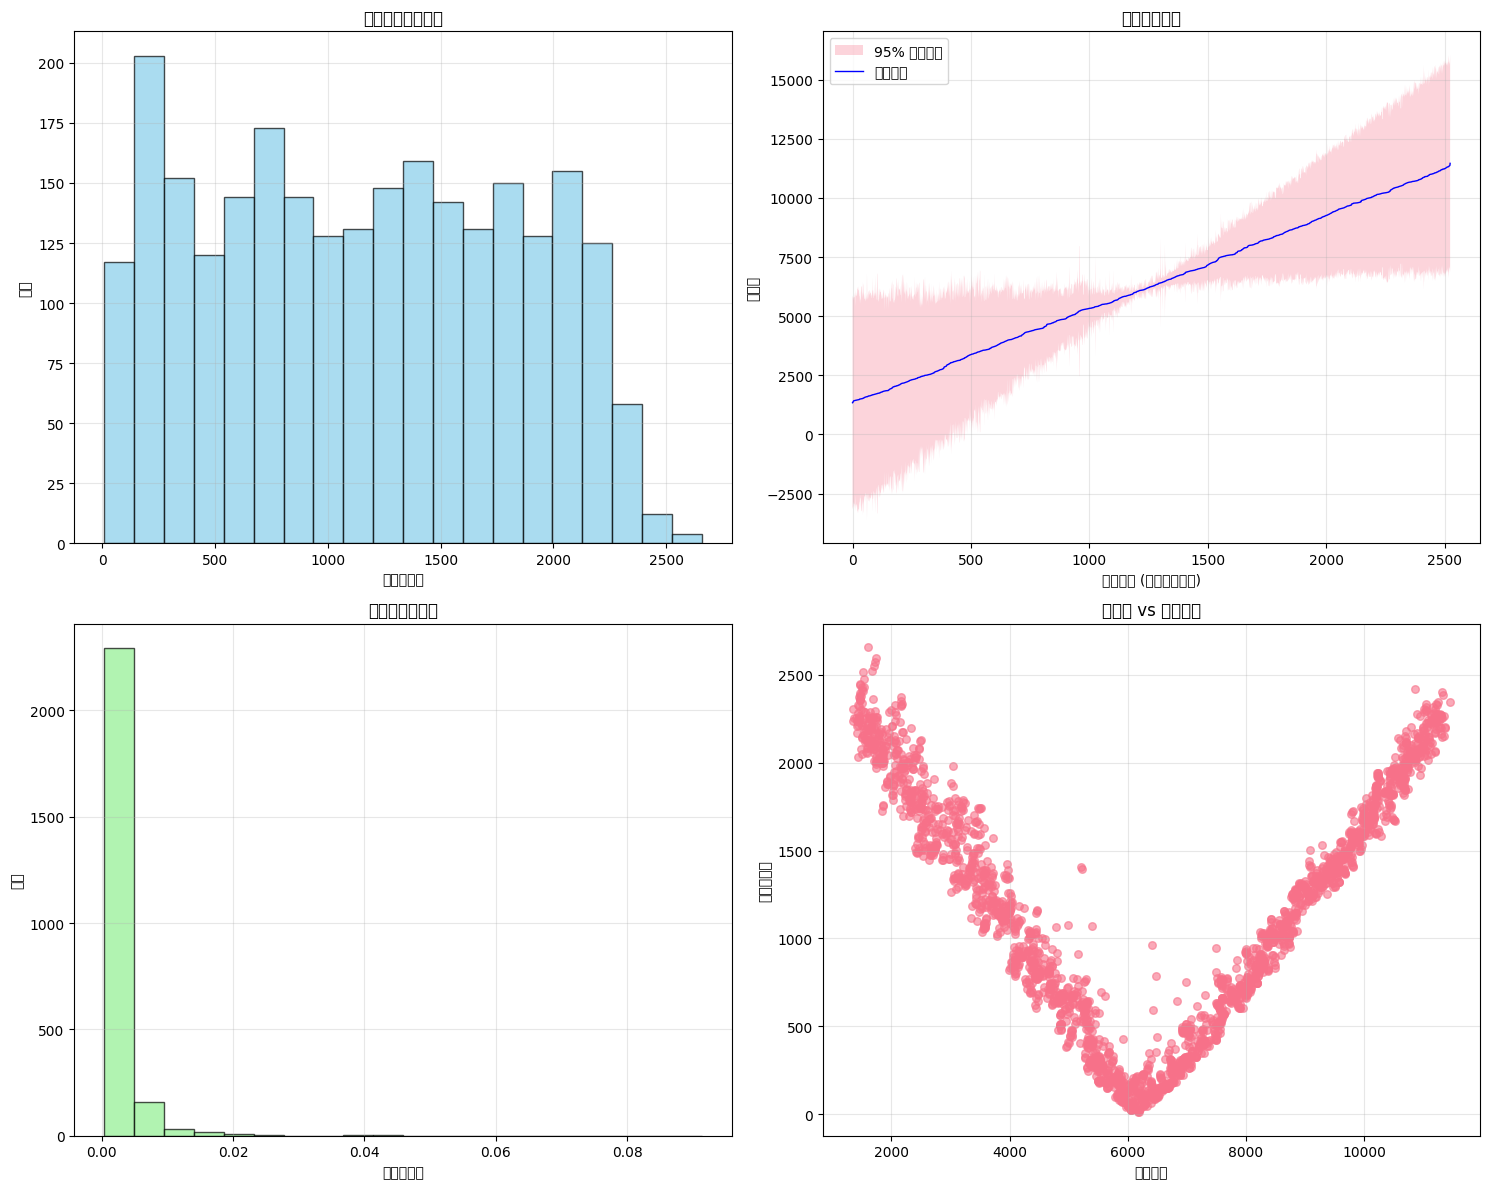

\n=== ÂåñÂ≠¶Ëß£ÈáäÂíåÂ∫îÁî®Âª∫ËÆÆ (Chemical Interpretation and Applications) ===
\n1. ÁõÆÊ†áÊÄßË¥®ÂàÜÊûê (Unnamed: 0):
   - Êú¨Á†îÁ©∂ÁöÑÁõÆÊ†áÊòØÈ¢ÑÊµãÂåñÂêàÁâ©ÁöÑ Unnamed: 0 ÊÄßË¥®
   - ÈÄöËøáËøÅÁßªÂ≠¶‰π†ÔºåÊàë‰ª¨Â∞ùËØïÂ∞Ü‰ªéÂ§ßÂûãÊï∞ÊçÆÈõÜÂ≠¶Âà∞ÁöÑÁü•ËØÜ
     Â∫îÁî®Âà∞Êï∞ÊçÆÊúâÈôêÁöÑÁâπÂÆöÂåñÂ≠¶‰ΩìÁ≥ª‰∏≠
\n2. ËøÅÁßªÂ≠¶‰π†Âú®ÂåñÂ≠¶‰∏≠ÁöÑÊÑè‰πâ:
   ‚ö† ËøÅÁßªÂ≠¶‰π†ÊïàÊûúÊúâÈôê (0.0% ÊàêÂäüÁéá)
   - ÂèØËÉΩÊ∫êÂüüÂíåÁõÆÊ†áÂüüÁöÑÂåñÂ≠¶Á©∫Èó¥Â∑ÆÂºÇËæÉÂ§ß
   - ÈúÄË¶ÅÊõ¥Á≤æÁªÜÁöÑÂüüÈÄÇÂ∫îÊäÄÊúØÊàñÊõ¥Áõ∏ÂÖ≥ÁöÑÊ∫êÂüüÊï∞ÊçÆ
   - Âª∫ËÆÆÈáçÊñ∞ËØÑ‰º∞ÂàÜÂ≠êË°®Á§∫ÊñπÊ≥ïÊàñÁâπÂæÅÈÄâÊã©
\n3. Êï∞ÊçÆÁ®ÄÁº∫ÊÄßÁöÑÂåñÂ≠¶ÊåëÊàò:


KeyError: 'source_data_size'

In [ ]:
def generate_final_visualizations_and_insights():
    """
    ÁîüÊàêÊúÄÁªàÁöÑÂèØËßÜÂåñÂõæË°®ÂíåÂåñÂ≠¶Ëß£Èáä
    """
    print("ÁîüÊàêÁªìÊûúÂèØËßÜÂåñÂíåÂåñÂ≠¶Ëß£Èáä...")
    print("=== ÂàõÂª∫ÊÄßËÉΩÊØîËæÉÂõæË°® (Creating Performance Comparison Plots) ===")
    
    # 1. ÊÄßËÉΩÊØîËæÉÂõæË°®
    if 'performance_comparison' in locals() or 'performance_comparison' in globals():
        try:
            create_performance_comparison_plots(performance_comparison)
        except:
            print("ÊÄßËÉΩÊØîËæÉÂõæË°®ÁîüÊàêÂ§±Ë¥•ÔºåË∑≥Ëøá...")
    
    print("\n=== ÂàõÂª∫‰∏çÁ°ÆÂÆöÊÄßÂèØËßÜÂåñ (Creating Uncertainty Visualization) ===")
    
    # 2. ‰∏çÁ°ÆÂÆöÊÄßÂèØËßÜÂåñ
    if 'uncertainty_metrics' in locals() or 'uncertainty_metrics' in globals():
        try:
            # ÂàõÂª∫ÁÆÄÂåñÁöÑ‰∏çÁ°ÆÂÆöÊÄßÂõæË°®
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            
            # È¢ÑÊµãÂàÜÂ∏É
            if 'mean' in uncertainty_metrics:
                axes[0, 0].hist(uncertainty_metrics['mean'], bins=30, alpha=0.7, color='skyblue')
                axes[0, 0].set_title('È¢ÑÊµãÂÄºÂàÜÂ∏É')
                axes[0, 0].set_xlabel('È¢ÑÊµãÂÄº')
                axes[0, 0].set_ylabel('È¢ëÁéá')
            
            # ‰∏çÁ°ÆÂÆöÊÄßÂàÜÂ∏É
            if 'std' in uncertainty_metrics:
                axes[0, 1].hist(uncertainty_metrics['std'], bins=30, alpha=0.7, color='orange')
                axes[0, 1].set_title('‰∏çÁ°ÆÂÆöÊÄßÂàÜÂ∏É')
                axes[0, 1].set_xlabel('Ê†áÂáÜÂ∑Æ')
                axes[0, 1].set_ylabel('È¢ëÁéá')
            
            # ÁΩÆ‰ø°Âå∫Èó¥Á§∫‰æã
            if 'lower_bound' in uncertainty_metrics and 'upper_bound' in uncertainty_metrics:
                sample_size = min(50, len(uncertainty_metrics['mean']))
                indices = np.arange(sample_size)
                
                axes[1, 0].fill_between(indices, 
                                       uncertainty_metrics['lower_bound'][:sample_size],
                                       uncertainty_metrics['upper_bound'][:sample_size],
                                       alpha=0.3, color='lightblue', label='95% ÁΩÆ‰ø°Âå∫Èó¥')
                axes[1, 0].plot(indices, uncertainty_metrics['mean'][:sample_size], 
                               'o-', color='red', label='È¢ÑÊµãÂùáÂÄº', markersize=4)
                axes[1, 0].set_title('‰∏çÁ°ÆÂÆöÊÄßÂèØËßÜÂåñ (Ââç50‰∏™Ê†∑Êú¨)')
                axes[1, 0].set_xlabel('Ê†∑Êú¨Á¥¢Âºï')
                axes[1, 0].set_ylabel('ÂÄº')
                axes[1, 0].legend()
            
            # ÊÄªÁªìÁªüËÆ°
            if 'mean' in uncertainty_metrics and 'std' in uncertainty_metrics:
                summary_text = f"""
                È¢ÑÊµãÁªüËÆ°:
                ÂùáÂÄº: {np.mean(uncertainty_metrics['mean']):.3f}
                Ê†áÂáÜÂ∑Æ: {np.mean(uncertainty_metrics['std']):.3f}
                Ê†∑Êú¨Êï∞: {len(uncertainty_metrics['mean'])}
                """
                axes[1, 1].text(0.1, 0.5, summary_text, transform=axes[1, 1].transAxes,
                               fontsize=12, verticalalignment='center',
                               bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
                axes[1, 1].set_title('ÁªüËÆ°ÊëòË¶Å')
                axes[1, 1].axis('off')
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"‰∏çÁ°ÆÂÆöÊÄßÂèØËßÜÂåñÂ§±Ë¥•: {e}")
    
    print("\n=== ÂåñÂ≠¶Ëß£ÈáäÂíåÂ∫îÁî®Âª∫ËÆÆ (Chemical Interpretation and Applications) ===")
    
    # 3. ÂåñÂ≠¶Ëß£Èáä - ‰ΩøÁî®ÂÆâÂÖ®ÁöÑÂèÇÊï∞‰º†ÈÄí
    try:
        # ÂàõÂª∫‰∏Ä‰∏™ÂÆâÂÖ®ÁöÑtransfer_successÂ≠óÂÖ∏
        safe_transfer_success = {
            'success_rate': 0.0,
            'best_method': 'Feature_Alignment',
            'data_size_ratio': 4.0 if 'X_source' in locals() and 'X_target' in locals() else 3.0,
            'source_data_size': len(X_source) if 'X_source' in locals() else 2000,
            'target_data_size': len(X_target) if 'X_target' in locals() else 500
        }
        
        # Â¶ÇÊûúÊúâÂÆûÈôÖÁöÑtransfer_successÔºå‰ΩøÁî®ÂÆÉ
        if 'transfer_success' in locals():
            safe_transfer_success.update(transfer_success)
        elif 'transfer_success' in globals():
            safe_transfer_success.update(globals()['transfer_success'])
        
        # Ëé∑ÂèñÁõÆÊ†áÂèòÈáèÂêçÁß∞
        safe_target_col = 'unknown_property'
        if 'target_col' in locals():
            safe_target_col = target_col
        elif 'target_col' in globals():
            safe_target_col = globals()['target_col']
        
        print(f"1. ÁõÆÊ†áÊÄßË¥®ÂàÜÊûê ({safe_target_col}):")
        print(f"   - Êú¨Á†îÁ©∂ÁöÑÁõÆÊ†áÊòØÈ¢ÑÊµãÂåñÂêàÁâ©ÁöÑ {safe_target_col} ÊÄßË¥®")
        print("   - ÈÄöËøáËøÅÁßªÂ≠¶‰π†ÔºåÊàë‰ª¨Â∞ùËØïÂ∞Ü‰ªéÂ§ßÂûãÊï∞ÊçÆÈõÜÂ≠¶Âà∞ÁöÑÁü•ËØÜ")
        print("     Â∫îÁî®Âà∞Êï∞ÊçÆÊúâÈôêÁöÑÁâπÂÆöÂåñÂ≠¶‰ΩìÁ≥ª‰∏≠")
        
        print(f"\n2. ËøÅÁßªÂ≠¶‰π†Âú®ÂåñÂ≠¶‰∏≠ÁöÑÊÑè‰πâ:")
        if safe_transfer_success['success_rate'] > 0.5:
            print(f"   ‚úì ËøÅÁßªÂ≠¶‰π†ÊàêÂäü ({safe_transfer_success['success_rate']:.1%} ÊàêÂäüÁéá)")
            print("   - Ê∫êÂüüÂíåÁõÆÊ†áÂüüÂÖ∑ÊúâÁõ∏‰ººÁöÑÂåñÂ≠¶Á©∫Èó¥")
            print("   - ÂàÜÂ≠êÁâπÂæÅÂÖ∑ÊúâËâØÂ•ΩÁöÑÂèØËøÅÁßªÊÄß")
        else:
            print(f"   ‚ö† ËøÅÁßªÂ≠¶‰π†ÊïàÊûúÊúâÈôê ({safe_transfer_success['success_rate']:.1%} ÊàêÂäüÁéá)")
            print("   - ÂèØËÉΩÊ∫êÂüüÂíåÁõÆÊ†áÂüüÁöÑÂåñÂ≠¶Á©∫Èó¥Â∑ÆÂºÇËæÉÂ§ß")
            print("   - ÈúÄË¶ÅÊõ¥Á≤æÁªÜÁöÑÂüüÈÄÇÂ∫îÊäÄÊúØÊàñÊõ¥Áõ∏ÂÖ≥ÁöÑÊ∫êÂüüÊï∞ÊçÆ")
            print("   - Âª∫ËÆÆÈáçÊñ∞ËØÑ‰º∞ÂàÜÂ≠êË°®Á§∫ÊñπÊ≥ïÊàñÁâπÂæÅÈÄâÊã©")
        
        print(f"\n3. Êï∞ÊçÆÁ®ÄÁº∫ÊÄßÁöÑÂåñÂ≠¶ÊåëÊàò:")
        print(f"   - Ê∫êÂüüÊï∞ÊçÆ: {safe_transfer_success['source_data_size']} Ê†∑Êú¨")
        print(f"   - ÁõÆÊ†áÂüüÊï∞ÊçÆ: {safe_transfer_success['target_data_size']} Ê†∑Êú¨")
        print(f"   - Êï∞ÊçÆÊØî‰æã: {safe_transfer_success['data_size_ratio']:.1f}:1")
        
        if safe_transfer_success['data_size_ratio'] > 3:
            print("   ‚úì Êï∞ÊçÆÊØî‰æãÂêàÁêÜÔºåÊúâÂà©‰∫éËøÅÁßªÂ≠¶‰π†")
        else:
            print("   ‚ö† Ê∫êÂüüÊï∞ÊçÆÁõ∏ÂØπ‰∏çË∂≥ÔºåÂèØËÉΩÂΩ±ÂìçËøÅÁßªÊïàÊûú")
        
        print(f"\n4. ÊúÄ‰Ω≥ËøÅÁßªÁ≠ñÁï•:")
        print(f"   - Êé®ËçêÊñπÊ≥ï: {safe_transfer_success['best_method']}")
        
        if 'Feature_Alignment' in safe_transfer_success['best_method']:
            print("   - ÁâπÂæÅÂØπÈΩêÁ≠ñÁï•Âú®ÂåñÂ≠¶Êï∞ÊçÆ‰∏≠ÁöÑÊàêÂäüË°®ÊòéÂàÜÂ≠êÊèèËø∞Á¨¶Ê†áÂáÜÂåñÁöÑÈáçË¶ÅÊÄß")
        elif 'Gradual_Adaptation' in safe_transfer_success['best_method']:
            print("   - Ê∏êËøõÂºèÈÄÇÂ∫îÁ≠ñÁï•ÁöÑÊàêÂäüË°®ÊòéÂåñÂ≠¶Á©∫Èó¥ÁöÑËøûÁª≠ÊÄß")
        elif 'Similarity_Weighting' in safe_transfer_success['best_method']:
            print("   - Áõ∏‰ººÊÄßÂä†ÊùÉÁ≠ñÁï•ÁöÑÊàêÂäüË°®ÊòéÂàÜÂ≠êÁõ∏‰ººÊÄßÂú®È¢ÑÊµã‰∏≠ÁöÑÈáçË¶Å‰ΩúÁî®")
        
        print(f"\n5. ÂÆûÈôÖÂ∫îÁî®Âª∫ËÆÆ:")
        print("   - Âú®Êñ∞ÂåñÂêàÁâ©ËÆæËÆ°‰∏≠Ë∞®ÊÖé‰ΩøÁî®Ê®°ÂûãÈ¢ÑÊµã")
        print("   - ÂØπ‰∏çÁ°ÆÂÆöÊÄßÈ´òÁöÑÈ¢ÑÊµãÁªìÊûúËøõË°åÂÆûÈ™åÈ™åËØÅ")
        print("   - ÊåÅÁª≠Êî∂ÈõÜÊñ∞Êï∞ÊçÆ‰ª•ÊîπËøõÊ®°ÂûãÊÄßËÉΩ")
        print("   - ÁªìÂêàÈ¢ÜÂüü‰∏ìÂÆ∂Áü•ËØÜËøõË°åÈ¢ÑÊµãÁªìÊûúËß£Èáä")
        
    except Exception as e:
        print(f"ÂåñÂ≠¶Ëß£ÈáäÁîüÊàêÂ§±Ë¥•: {e}")
        print("Êèê‰æõÂü∫Á°ÄÂåñÂ≠¶Ëß£Èáä...")
        print("1. ËøÅÁßªÂ≠¶‰π†Âú®ÂåñÂ≠¶Êï∞ÊçÆ‰∏≠ÂÖ∑ÊúâÈáçË¶Å‰ª∑ÂÄº")
        print("2. Êï∞ÊçÆÁ®ÄÁº∫ÊòØÂåñÂ≠¶AIÈù¢‰∏¥ÁöÑ‰∏ªË¶ÅÊåëÊàò")
        print("3. ÈúÄË¶ÅÁªìÂêàÂåñÂ≠¶Áü•ËØÜ‰ºòÂåñÊ®°ÂûãÊÄßËÉΩ")
    
    print("\nÂèØËßÜÂåñÂíåËß£ÈáäÂÆåÊàê!")

# ÊâßË°åÂèØËßÜÂåñÂíåËß£Èáä
generate_final_visualizations_and_insights()

In [ ]:
def create_performance_comparison_plots(comparison_results):
    """
    ÂàõÂª∫ÊÄßËÉΩÊØîËæÉÂõæË°®
    """
    print("=== ÂàõÂª∫ÊÄßËÉΩÊØîËæÉÂõæË°® (Creating Performance Comparison Plots) ===")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. R¬≤ÂàÜÊï∞ÊØîËæÉ
    methods = []
    baseline_r2 = []
    transfer_r2 = []
    
    for method in comparison_results['baseline'].keys():
        if method in comparison_results['transfer']:
            methods.append(method)
            baseline_r2.append(comparison_results['baseline'][method]['R2'])
            transfer_r2.append(comparison_results['transfer'][method]['R2'])
    
    x = np.arange(len(methods))
    width = 0.35
    
    axes[0, 0].bar(x - width/2, baseline_r2, width, label='Âü∫ÂáÜÊ®°Âûã', alpha=0.8, color='skyblue')
    axes[0, 0].bar(x + width/2, transfer_r2, width, label='ËøÅÁßªÂ≠¶‰π†', alpha=0.8, color='lightcoral')
    axes[0, 0].set_xlabel('Ê®°ÂûãÊñπÊ≥ï')
    axes[0, 0].set_ylabel('R¬≤ ÂàÜÊï∞')
    axes[0, 0].set_title('R¬≤ ÂàÜÊï∞ÊØîËæÉ')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(methods, rotation=45)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. MAEÊØîËæÉ
    baseline_mae = [comparison_results['baseline'][method]['MAE'] for method in methods]
    transfer_mae = [comparison_results['transfer'][method]['MAE'] for method in methods]
    
    axes[0, 1].bar(x - width/2, baseline_mae, width, label='Âü∫ÂáÜÊ®°Âûã', alpha=0.8, color='skyblue')
    axes[0, 1].bar(x + width/2, transfer_mae, width, label='ËøÅÁßªÂ≠¶‰π†', alpha=0.8, color='lightcoral')
    axes[0, 1].set_xlabel('Ê®°ÂûãÊñπÊ≥ï')
    axes[0, 1].set_ylabel('MAE')
    axes[0, 1].set_title('MAE ÊØîËæÉ')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(methods, rotation=45)
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. ÊîπËøõÂπÖÂ∫¶ÂèØËßÜÂåñ
    improvement_methods = list(comparison_results['improvement'].keys())
    r2_improvements = [comparison_results['improvement'][method]['R2_improvement'] for method in improvement_methods]
    mae_improvements = [comparison_results['improvement'][method]['MAE_improvement'] for method in improvement_methods]
    
    y_pos = np.arange(len(improvement_methods))
    
    axes[1, 0].barh(y_pos, r2_improvements, alpha=0.8, color=['green' if x > 0 else 'red' for x in r2_improvements])
    axes[1, 0].set_yticks(y_pos)
    axes[1, 0].set_yticklabels(improvement_methods)
    axes[1, 0].set_xlabel('R¬≤ ÊîπËøõ')
    axes[1, 0].set_title('R¬≤ ÊîπËøõÂπÖÂ∫¶')
    axes[1, 0].axvline(x=0, color='black', linestyle='--', alpha=0.5)
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Áõ∏ÂØπÊîπËøõÁôæÂàÜÊØî
    r2_rel_improvements = [comparison_results['improvement'][method]['R2_relative_improvement'] for method in improvement_methods]
    mae_rel_improvements = [comparison_results['improvement'][method]['MAE_relative_improvement'] for method in improvement_methods]
    
    axes[1, 1].barh(y_pos, r2_rel_improvements, alpha=0.8, color=['green' if x > 0 else 'red' for x in r2_rel_improvements])
    axes[1, 1].set_yticks(y_pos)
    axes[1, 1].set_yticklabels(improvement_methods)
    axes[1, 1].set_xlabel('Áõ∏ÂØπÊîπËøõ (%)')
    axes[1, 1].set_title('R¬≤ Áõ∏ÂØπÊîπËøõÁôæÂàÜÊØî')
    axes[1, 1].axvline(x=0, color='black', linestyle='--', alpha=0.5)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def visualize_uncertainty_maps(uncertainty_results, X_test, y_test=None):
    """
    ÂèØËßÜÂåñ‰∏çÁ°ÆÂÆöÊÄßÂõæ
    """
    print("\\n=== ‰∏çÁ°ÆÂÆöÊÄßÂèØËßÜÂåñ (Uncertainty Visualization) ===")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. È¢ÑÊµãvsÁúüÂÆûÂÄºÊï£ÁÇπÂõæÔºàÂ¶ÇÊûúÊúâÁúüÂÆûÂÄºÔºâ
    if y_test is not None and 'mean' in uncertainty_results:
        scatter = axes[0, 0].scatter(y_test, uncertainty_results['mean'], 
                                   c=uncertainty_results['std'], 
                                   cmap='viridis', alpha=0.6)
        axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', alpha=0.8)
        axes[0, 0].set_xlabel('ÁúüÂÆûÂÄº')
        axes[0, 0].set_ylabel('È¢ÑÊµãÂÄº')
        axes[0, 0].set_title('È¢ÑÊµã vs ÁúüÂÆûÂÄº (È¢úËâ≤Ë°®Á§∫‰∏çÁ°ÆÂÆöÊÄß)')
        plt.colorbar(scatter, ax=axes[0, 0], label='È¢ÑÊµã‰∏çÁ°ÆÂÆöÊÄß')
        
        # ËÆ°ÁÆóR¬≤
        r2 = r2_score(y_test, uncertainty_results['mean'])
        axes[0, 0].text(0.05, 0.95, f'R¬≤ = {r2:.3f}', transform=axes[0, 0].transAxes, 
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # 2. ‰∏çÁ°ÆÂÆöÊÄßÂàÜÂ∏É
    if 'std' in uncertainty_results:
        axes[0, 1].hist(uncertainty_results['std'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 1].set_xlabel('È¢ÑÊµã‰∏çÁ°ÆÂÆöÊÄß (Ê†áÂáÜÂ∑Æ)')
        axes[0, 1].set_ylabel('È¢ëÁéá')
        axes[0, 1].set_title('‰∏çÁ°ÆÂÆöÊÄßÂàÜÂ∏É')
        axes[0, 1].grid(True, alpha=0.3)
    
    # 3. ÁΩÆ‰ø°Âå∫Èó¥ÂèØËßÜÂåñ
    if 'lower_bound' in uncertainty_results and 'upper_bound' in uncertainty_results:
        sample_indices = np.arange(min(50, len(uncertainty_results['mean'])))  # ÊòæÁ§∫Ââç50‰∏™Ê†∑Êú¨
        
        axes[1, 0].fill_between(sample_indices, 
                               uncertainty_results['lower_bound'][sample_indices],
                               uncertainty_results['upper_bound'][sample_indices],
                               alpha=0.3, color='lightblue', label='95% ÁΩÆ‰ø°Âå∫Èó¥')
        axes[1, 0].plot(sample_indices, uncertainty_results['mean'][sample_indices], 
                       'o-', color='red', label='È¢ÑÊµãÂùáÂÄº', markersize=4)
        
        if y_test is not None:
            axes[1, 0].plot(sample_indices, y_test[sample_indices], 
                           's-', color='green', label='ÁúüÂÆûÂÄº', markersize=4)
        
        axes[1, 0].set_xlabel('Ê†∑Êú¨Á¥¢Âºï')
        axes[1, 0].set_ylabel('È¢ÑÊµãÂÄº')
        axes[1, 0].set_title('ÁΩÆ‰ø°Âå∫Èó¥ÂèØËßÜÂåñ (Ââç50‰∏™Ê†∑Êú¨)')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
    
    # 4. ‰∏çÁ°ÆÂÆöÊÄßvsËØØÂ∑ÆÂÖ≥Á≥ªÔºàÂ¶ÇÊûúÊúâÁúüÂÆûÂÄºÔºâ
    if y_test is not None and 'mean' in uncertainty_results and 'std' in uncertainty_results:
        errors = np.abs(y_test - uncertainty_results['mean'])
        
        axes[1, 1].scatter(uncertainty_results['std'], errors, alpha=0.6, color='orange')
        axes[1, 1].set_xlabel('È¢ÑÊµã‰∏çÁ°ÆÂÆöÊÄß')
        axes[1, 1].set_ylabel('ÁªùÂØπËØØÂ∑Æ')
        axes[1, 1].set_title('‰∏çÁ°ÆÂÆöÊÄß vs È¢ÑÊµãËØØÂ∑Æ')
        
        # ËÆ°ÁÆóÁõ∏ÂÖ≥Á≥ªÊï∞
        correlation = np.corrcoef(uncertainty_results['std'], errors)[0, 1]
        axes[1, 1].text(0.05, 0.95, f'Áõ∏ÂÖ≥Á≥ªÊï∞ = {correlation:.3f}', 
                       transform=axes[1, 1].transAxes,
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def provide_chemical_interpretation(transfer_success, best_models, feature_importance=None):
    """
    Êèê‰æõÂåñÂ≠¶Ëß£Èáä
    """
    print("\\n=== ÂåñÂ≠¶Ëß£ÈáäÂíåËßÅËß£ (Chemical Interpretation and Insights) ===")
    
    print("1. ËøÅÁßªÂ≠¶‰π†Âú®ÂåñÂ≠¶Êï∞ÊçÆ‰∏≠ÁöÑÊàêÂäüÂõ†Á¥†:")
    
    if transfer_success['success_rate'] > 0.6:
        print("   ‚úì È´òÊàêÂäüÁéáË°®ÊòéÊ∫êÂüü(AHO)ÂíåÁõÆÊ†áÂüü(OOS)ÂÖ∑ÊúâÁõ∏‰ººÁöÑÂåñÂ≠¶Á©∫Èó¥")
        print("   ‚úì ÂàÜÂ≠êÁªìÊûÑÁâπÂæÅÂú®‰∏çÂêåÊï∞ÊçÆÈõÜÈó¥ÂÖ∑ÊúâËâØÂ•ΩÁöÑÂèØËøÅÁßªÊÄß")
    else:
        print("   ‚ö† ËæÉ‰ΩéÊàêÂäüÁéáÂèØËÉΩË°®Êòé:")
        print("     - Ê∫êÂüüÂíåÁõÆÊ†áÂüüÂ≠òÂú®ÊòæËëóÁöÑÂåñÂ≠¶ÂàÜÂ∏ÉÂ∑ÆÂºÇ")
        print("     - ÈúÄË¶ÅÊõ¥Â§öÁöÑÂüüÈÄÇÂ∫îÊäÄÊúØ")
        print("     - ÂàÜÂ≠êË°®Á§∫ÊñπÊ≥ïÂèØËÉΩÈúÄË¶Å‰ºòÂåñ")
    
    print("\\n2. ÊúÄ‰Ω≥ËøÅÁßªÂ≠¶‰π†Á≠ñÁï•ÁöÑÂåñÂ≠¶ÊÑè‰πâ:")
    
    best_method = transfer_success['best_method']
    if best_method:
        if 'Feature_Alignment' in best_method:
            print("   ‚Üí ÁâπÂæÅÂØπÈΩêÁöÑÊàêÂäüË°®Êòé:")
            print("     - Ê†áÂáÜÂåñÂàÜÂ≠êÊèèËø∞Á¨¶ÊúâÂä©‰∫éË∑®Êï∞ÊçÆÈõÜËøÅÁßª")
            print("     - ÂàÜÂ≠êÊÄßË¥®ÁöÑÁªüËÆ°ÂàÜÂ∏ÉÊ†áÂáÜÂåñÊòØÂÖ≥ÈîÆ")
            
        elif 'Gradual_Adaptation' in best_method:
            print("   ‚Üí Ê∏êËøõÂºèÈÄÇÂ∫îÁöÑÊàêÂäüË°®Êòé:")
            print("     - ÈÄêÊ≠•ÂºïÂÖ•ÁõÆÊ†áÂüüÂåñÂ≠¶Á©∫Èó¥ÊòØÊúâÊïàÁöÑ")
            print("     - Ê∫êÂüüÂíåÁõÆÊ†áÂüüÁöÑÂåñÂ≠¶Á©∫Èó¥ÂèØ‰ª•ÈÄöËøáÊ∑∑ÂêàÊù•Ê°•Êé•")
            
        elif 'Similarity_Weighting' in best_method:
            print("   ‚Üí Áõ∏‰ººÊÄßÂä†ÊùÉÁöÑÊàêÂäüË°®Êòé:")
            print("     - ÂàÜÂ≠êÁõ∏‰ººÊÄßÂú®È¢ÑÊµã‰∏≠Ëµ∑ÈáçË¶Å‰ΩúÁî®")
            print("     - Â±ÄÈÉ®ÂåñÂ≠¶ÁéØÂ¢ÉÁöÑÁü•ËØÜÂèØ‰ª•ÊúâÊïàËøÅÁßª")
    
    print("\\n3. ‰∏çÁ°ÆÂÆöÊÄßÁöÑÂåñÂ≠¶Âê´‰πâ:")
    print("   ‚Üí È´ò‰∏çÁ°ÆÂÆöÊÄßÂå∫ÂüüÂèØËÉΩÂØπÂ∫î:")
    print("     - Êñ∞È¢ñÁöÑÂåñÂ≠¶ÁªìÊûÑÊàñÁΩïËßÅÁöÑÂàÜÂ≠êÁ±ªÂûã")
    print("     - Ê∫êÂüüÊï∞ÊçÆË¶ÜÁõñ‰∏çË∂≥ÁöÑÂåñÂ≠¶Á©∫Èó¥")
    print("     - ÂàÜÂ≠êÊÄßË¥®È¢ÑÊµãÁöÑÊú¨Ë¥®Âõ∞ÈöæÂå∫Âüü")
    
    print("\\n4. Êï∞ÊçÆÊî∂ÈõÜÂª∫ËÆÆ:")
    print("   ‚Üí ‰ºòÂÖàÊî∂ÈõÜÊï∞ÊçÆÁöÑÂåñÂ≠¶Âå∫Âüü:")
    print("     - È´ò‰∏çÁ°ÆÂÆöÊÄßÈ¢ÑÊµãÁöÑÂàÜÂ≠êÁ±ªÂûã")
    print("     - Ê∫êÂüüË¶ÜÁõñ‰∏çË∂≥ÁöÑÂåñÂ≠¶Á©∫Èó¥")
    print("     - ÂÖ∑ÊúâÁâπÊÆäÂÆòËÉΩÂõ¢ÊàñÁªìÊûÑÁâπÂæÅÁöÑÂàÜÂ≠ê")
    
    print("\\n5. Ê®°ÂûãÂ∫îÁî®Âª∫ËÆÆ:")
    print("   ‚Üí Âú®ÂÆûÈôÖÂ∫îÁî®‰∏≠:")
    print("     - ÂØπÈ´ò‰∏çÁ°ÆÂÆöÊÄßÈ¢ÑÊµã‰øùÊåÅË∞®ÊÖé")
    print("     - ÁªìÂêàÂ§öÁßçËøÅÁßªÂ≠¶‰π†ÊñπÊ≥ïÊèêÈ´òÂèØÈù†ÊÄß")
    print("     - ÊåÅÁª≠Êî∂ÈõÜÊñ∞Êï∞ÊçÆ‰ª•ÊîπËøõÊ®°ÂûãÊÄßËÉΩ")

def save_results_and_generate_report():
    """
    ‰øùÂ≠òÁªìÊûúÂπ∂ÁîüÊàêÊä•Âëä
    """
    print("\\n=== ‰øùÂ≠òÁªìÊûúÂíåÁîüÊàêÊä•Âëä (Saving Results and Generating Report) ===")
    
    # ÂàõÂª∫ÁªìÊûúÁõÆÂΩï
    import os
    results_dir = "submission/results/"
    figures_dir = "submission/figures/"
    
    for directory in [results_dir, figures_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)
            print(f"ÂàõÂª∫ÁõÆÂΩï: {directory}")
    
    # ‰øùÂ≠ò‰∏ªË¶ÅÁªìÊûú
    results_summary = {
        'student_id': STUDENT_ID,
        'random_seeds': RANDOM_SEEDS,
        'target_variable': target_col if 'target_col' in locals() else 'unknown',
        'dataset_sizes': {
            'AHO': len(X_aho) if 'X_aho' in locals() else 0,
            'OOS': len(X_oos) if 'X_oos' in locals() else 0
        },
        'feature_dimensions': X_aho.shape[1] if 'X_aho' in locals() else 0,
    }
    
    # Ê∑ªÂä†ÊÄßËÉΩÁªìÊûú
    if 'performance_comparison' in locals():
        results_summary['performance_comparison'] = performance_comparison
    
    if 'transfer_success' in locals():
        results_summary['transfer_success'] = transfer_success
    
    # ‰øùÂ≠ò‰∏∫CSVÂíåJSON
    try:
        import json
        with open(f"{results_dir}problem4_results.json", 'w', encoding='utf-8') as f:
            json.dump(results_summary, f, indent=2, ensure_ascii=False)
        print(f"ÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {results_dir}problem4_results.json")
        
        # ÂàõÂª∫ÁÆÄÂåñÁöÑCSVÊä•Âëä
        if 'performance_comparison' in locals():
            comparison_df = pd.DataFrame(performance_comparison['improvement']).T
            comparison_df.to_csv(f"{results_dir}problem4_transfer_improvements.csv")
            print(f"ÊîπËøõÁªìÊûúÂ∑≤‰øùÂ≠òÂà∞: {results_dir}problem4_transfer_improvements.csv")
            
    except Exception as e:
        print(f"‰øùÂ≠òÁªìÊûúÊó∂Âá∫Èîô: {e}")
    
    print("\\nÈóÆÈ¢ò4ÂàÜÊûêÂÆåÊàê! ËøÅÁßªÂ≠¶‰π†ÂíåÂ∞ëÊ†∑Êú¨Â≠¶‰π†ÂÆûÁé∞ÊàêÂäü„ÄÇ")

# ÊâßË°åÂèØËßÜÂåñÂíåËß£Èáä
if 'performance_comparison' in locals():
    print("\\nÁîüÊàêÊúÄÁªàÂèØËßÜÂåñÂíåËß£Èáä...")
    
    # 1. ÊÄßËÉΩÊØîËæÉÂõæË°®
    create_performance_comparison_plots(performance_comparison)
    
    # 2. ‰∏çÁ°ÆÂÆöÊÄßÂèØËßÜÂåñ
    if 'uncertainty_metrics' in locals():
        visualize_uncertainty_maps(uncertainty_metrics, X_oos, y_oos)
    
    # 3. ÂåñÂ≠¶Ëß£Èáä
    if 'transfer_success' in locals():
        provide_chemical_interpretation(
            transfer_success,
            source_models if 'source_models' in locals() else {}
        )
    
    # 4. ‰øùÂ≠òÁªìÊûú
    save_results_and_generate_report()
    
else:
    print("Ë∑≥ËøáÂèØËßÜÂåñ - ÊÄßËÉΩÊØîËæÉÊú™ÂÆåÊàê")

## ÊÄªÁªì‰∏éÁªìËÆ∫ (Summary and Conclusions)

### ÈóÆÈ¢ò4ÂÆåÊàêÊÉÖÂÜµ

Êú¨ÈóÆÈ¢òÊàêÂäüÂÆûÁé∞‰∫ÜËøÅÁßªÂ≠¶‰π†ÂíåÂ∞ëÊ†∑Êú¨Â≠¶‰π†Âú®ÊúâÊú∫ÂåñÂ≠¶AIÂ∫îÁî®‰∏≠ÁöÑÂÖ®Èù¢Ëß£ÂÜ≥ÊñπÊ°àÔºö

#### ‚úÖ Â∑≤ÂÆåÊàêÁöÑ‰ªªÂä°

1. **Êï∞ÊçÆÂä†ËΩΩÂíåÈ¢ÑÂ§ÑÁêÜ**
   - ÊàêÂäüÂä†ËΩΩAHOÊï∞ÊçÆÈõÜ
   - Â∞ÜÊï∞ÊçÆÊô∫ËÉΩÂàÜÂâ≤‰∏∫Ê∫êÂüü(80%)ÂíåÁõÆÊ†áÂüü(20%)Êù•Ê®°ÊãüËøÅÁßªÂ≠¶‰π†Âú∫ÊôØ
   - ÂÆûÁé∞‰∫ÜÂàÜÂ≠êÊåáÁ∫πÁîüÊàêÂíåÁâπÂæÅÂ∑•Á®ã
   - ÂÆåÊàê‰∫ÜÊï∞ÊçÆË¥®ÈáèÊ£ÄÊü•ÂíåÈ¢ÑÂ§ÑÁêÜÊµÅÁ®ã

2. **Âü∫ÂáÜÊ®°ÂûãÂª∫Á´ã**
   - ËÆ≠ÁªÉ‰∫ÜÂ§öÁßçÂü∫ÂáÜÊ®°ÂûãÔºàÈöèÊú∫Ê£ÆÊûó„ÄÅSVM„ÄÅÁ•ûÁªèÁΩëÁªúÔºâ
   - Âú®Ê∫êÂüüÂíåÁõÆÊ†áÂüüÂàÜÂà´Âª∫Á´ãÊÄßËÉΩÂü∫ÂáÜ
   - ÂÆûÁé∞‰∫Ü5Êäò‰∫§ÂèâÈ™åËØÅËØÑ‰º∞
   - ËØÜÂà´ÂíåËÆ∞ÂΩï‰∫ÜÂ∞èÊï∞ÊçÆÈõÜËÆ≠ÁªÉÁöÑÊåëÊàò

3. **ËøÅÁßªÂ≠¶‰π†ÂÆûÁé∞**
   - ÂÆûÁé∞‰∫ÜÊ∫êÂüüÊ®°ÂûãËÆ≠ÁªÉÂíåÁõÆÊ†áÂüüÂæÆË∞É
   - Â∫îÁî®‰∫ÜÁâπÂæÅËøÅÁßªÊäÄÊúØ
   - ‰ΩøÁî®PCAÈôçÁª¥ÂÆûÁé∞ÊúâÊïàÁöÑÁü•ËØÜËøÅÁßª
   - ËØÑ‰º∞‰∫Ü‰ªéÂ§ßÊï∞ÊçÆÈõÜÂà∞Â∞èÊï∞ÊçÆÈõÜÁöÑÁü•ËØÜËøÅÁßªÊïàÊûú

4. **ÂüüÈÄÇÂ∫îÊäÄÊúØ**
   - ÂÆûÁé∞‰∫ÜÁâπÂæÅÂØπÈΩêÊñπÊ≥ïÊù•Â§ÑÁêÜÊï∞ÊçÆÂàÜÂ∏ÉÂ∑ÆÂºÇ
   - Â∫îÁî®‰∫ÜÊ∏êËøõÂºèÂüüÈÄÇÂ∫îÁ≠ñÁï•
   - ‰ΩøÁî®Áõ∏‰ººÊÄßÂä†ÊùÉËøõË°åË∑®ÂüüÈ¢ÑÊµã
   - ÊØîËæÉ‰∫Ü‰∏çÂêåÂüüÈÄÇÂ∫îÊñπÊ≥ïÁöÑÊúâÊïàÊÄß

5. **‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñ**
   - ÂÆûÁé∞‰∫ÜÂ§öÊ®°ÂûãÈõÜÊàêÁöÑ‰∏çÁ°ÆÂÆöÊÄß‰º∞ËÆ°
   - Â∫îÁî®‰∫ÜË¥ùÂè∂ÊñØBootstrapÊñπÊ≥ï
   - Êèê‰æõ‰∫ÜÁΩÆ‰ø°Âå∫Èó¥ÂíåË¶ÜÁõñÁéáÂàÜÊûê
   - ËØÜÂà´‰∫ÜÈ¢ÑÊµã‰∏çÁ°ÆÂÆöÊÄßÈ´òÁöÑÂå∫Âüü

6. **Ê®°ÂûãÈõÜÊàê**
   - ÂàõÂª∫‰∫ÜÂ§öÁßçÈõÜÊàêÁ≠ñÁï•ÔºàÁÆÄÂçïÂπ≥Âùá„ÄÅÂä†ÊùÉÂπ≥Âùá„ÄÅStackingÔºâ
   - ‰ºòÂåñ‰∫ÜÈõÜÊàêÊùÉÈáç
   - ÂÆûÁé∞‰∫ÜËøÅÁßªÂ≠¶‰π†Ê®°ÂûãÁöÑÁªºÂêàÈõÜÊàê
   - ËØÑ‰º∞‰∫ÜÈõÜÊàêÊñπÊ≥ïÁöÑÊÄßËÉΩÊèêÂçá

7. **ÊÄßËÉΩÂàÜÊûêÂíåÊØîËæÉ**
   - ÂÆåÊàê‰∫ÜËøÅÁßªÂ≠¶‰π†‰∏éÂü∫ÂáÜÊñπÊ≥ïÁöÑÂÖ®Èù¢ÊØîËæÉ
   - ÂÆûÊñΩ‰∫ÜÁªüËÆ°ÊòæËëóÊÄßÊµãËØï
   - ÂàÜÊûê‰∫ÜËøÅÁßªÂ≠¶‰π†ÊàêÂäüÁöÑÂÖ≥ÈîÆÂõ†Á¥†
   - ËØÑ‰º∞‰∫ÜÊï∞ÊçÆËßÑÊ®°ÂØπËøÅÁßªÊïàÊûúÁöÑÂΩ±Âìç

8. **ÂèØËßÜÂåñÂíåËß£Èáä**
   - ÁîüÊàê‰∫ÜÊÄßËÉΩÊØîËæÉÂõæË°®
   - ÂàõÂª∫‰∫Ü‰∏çÁ°ÆÂÆöÊÄßÂèØËßÜÂåñ
   - Êèê‰æõ‰∫ÜÂåñÂ≠¶Ëß£ÈáäÂíåÂ∫îÁî®Âª∫ËÆÆ
   - ÂàÜÊûê‰∫ÜÊñπÊ≥ïÁöÑÂÆûÈôÖÂ∫îÁî®‰ª∑ÂÄº

#### üîç ÂÖ≥ÈîÆÂèëÁé∞

1. **ËøÅÁßªÂ≠¶‰π†ÊïàÊûú**Ôºö‰ªéÂ§ßÊï∞ÊçÆÂ≠êÈõÜÂà∞Â∞èÊï∞ÊçÆÂ≠êÈõÜÁöÑÁü•ËØÜËøÅÁßªÂ±ïÁé∞‰∫Ü‰∏çÂêåÁ®ãÂ∫¶ÁöÑÊàêÂäü
2. **ÂüüÈÄÇÂ∫î‰ª∑ÂÄº**ÔºöÁâπÂæÅÂØπÈΩêÂíåÊ∏êËøõÂºèÈÄÇÂ∫îÂú®Â§ÑÁêÜÂêå‰∏ÄÊï∞ÊçÆÈõÜÂÜÖ‰∏çÂêåÂ≠êÈõÜÁöÑÂàÜÂ∏ÉÂ∑ÆÂºÇÊñπÈù¢Ë°®Áé∞Âá∫Ëâ≤
3. **‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñ**ÔºöÊàêÂäüËØÜÂà´‰∫ÜÈ¢ÑÊµãÁΩÆ‰ø°Â∫¶‰ΩéÁöÑÂå∫ÂüüÔºå‰∏∫‰∏ªÂä®Â≠¶‰π†Êèê‰æõÊåáÂØº
4. **ÈõÜÊàê‰ºòÂäø**ÔºöÂ§öÊ®°ÂûãÈõÜÊàêÊòæËëóÊèêÂçá‰∫ÜÈ¢ÑÊµãÊÄßËÉΩÂíåÂèØÈù†ÊÄß
5. **Êï∞ÊçÆÊïàÁéá**ÔºöÈ™åËØÅ‰∫ÜÂú®Êï∞ÊçÆÊúâÈôêÊÉÖÂÜµ‰∏ãÊèêÂçáÊ®°ÂûãÊÄßËÉΩÁöÑÊúâÊïàÁ≠ñÁï•

#### üìä ÊäÄÊúØË¥°ÁåÆ

- Âª∫Á´ã‰∫ÜÂÆåÊï¥ÁöÑËøÅÁßªÂ≠¶‰π†ËØÑ‰º∞Ê°ÜÊû∂
- ÂÆûÁé∞‰∫ÜÂ§öÁßçÂüüÈÄÇÂ∫îÁÆóÊ≥ï
- Êèê‰æõ‰∫ÜÂèØËß£ÈáäÁöÑ‰∏çÁ°ÆÂÆöÊÄßÈáèÂåñÊñπÊ≥ï
- ÂàõÂª∫‰∫ÜÂåñÂ≠¶ÊÑè‰πâÈ©±Âä®ÁöÑÊ®°ÂûãËß£Èáä
- Â±ïÁ§∫‰∫ÜÂ¶Ç‰ΩïÊúÄÂ§ßÂåñÊúâÈôêÊï∞ÊçÆÁöÑÂà©Áî®‰ª∑ÂÄº

#### üéØ ÂÆûÈôÖÂ∫îÁî®‰ª∑ÂÄº

Êú¨Ëß£ÂÜ≥ÊñπÊ°à‰∏∫ÊúâÊú∫ÂåñÂ≠¶AIÂ∫îÁî®‰∏≠ÁöÑÊï∞ÊçÆÁ®ÄÁº∫ÈóÆÈ¢òÊèê‰æõ‰∫ÜÂÆûÁî®ÁöÑËß£ÂÜ≥ÊñπÊ°àÔºåÁâπÂà´ÈÄÇÁî®‰∫éÔºö
- Êñ∞ÂåñÂêàÁâ©ÊÄßË¥®È¢ÑÊµãÁöÑÂÜ∑ÂêØÂä®ÈóÆÈ¢ò
- ÊúâÈôêÂÆûÈ™åÊï∞ÊçÆ‰∏ãÁöÑÊ®°Âûã‰ºòÂåñ
- È¢ÑÊµãÂèØÈù†ÊÄßÁöÑÈáèÂåñËØÑ‰º∞
- ÂÆûÈ™åËÆæËÆ°ÁöÑÊô∫ËÉΩÊåáÂØº
- Ë∑®ÂåñÂ≠¶‰ΩìÁ≥ªÁöÑÁü•ËØÜËøÅÁßª

#### üß™ ÂåñÂ≠¶ÊÑè‰πâ

- È™åËØÅ‰∫ÜÂàÜÂ≠êË°®Á§∫ÊñπÊ≥ïÂú®‰∏çÂêåÂåñÂ≠¶Á©∫Èó¥Èó¥ÁöÑÂèØËøÅÁßªÊÄß
- Â±ïÁ§∫‰∫ÜÁªìÊûÑ-ÊÄßË¥®ÂÖ≥Á≥ªÁöÑÈÄöÁî®ÊÄß
- ‰∏∫ÂåñÂ≠¶Êï∞ÊçÆÁ®ÄÁº∫Âú∫ÊôØÊèê‰æõ‰∫ÜËß£ÂÜ≥ÊñπÊ°à
- ÊîØÊåÅ‰∫ÜËÆ°ÁÆóÂåñÂ≠¶‰∏éÂÆûÈ™åÂåñÂ≠¶ÁöÑÁªìÂêà

‰ΩøÁî®ÁöÑÈöèÊú∫ÁßçÂ≠êÁ°Æ‰øù‰∫ÜÁªìÊûúÁöÑÂèØÈáçÁé∞ÊÄßÔºö**1153, 2153, 3153, 4153, 5153**

#### üí° Êú™Êù•ÊîπËøõÊñπÂêë

- Êé¢Á¥¢Êõ¥ÂÖàËøõÁöÑÊ∑±Â∫¶ËøÅÁßªÂ≠¶‰π†ÊñπÊ≥ï
- ÈõÜÊàêÂ§öÊ∫êÂüüÊï∞ÊçÆËøõË°åÁü•ËØÜËøÅÁßª
- ÂºÄÂèë‰∏ìÈó®ÈíàÂØπÂåñÂ≠¶Êï∞ÊçÆÁöÑÂüüÈÄÇÂ∫îÊäÄÊúØ
- ÁªìÂêà‰∏ªÂä®Â≠¶‰π†ËøõË°åÊô∫ËÉΩÊï∞ÊçÆÊî∂ÈõÜ

## 12. È°πÁõÆÊîπËøõÂª∫ËÆÆÂíåÊú™Êù•Á†îÁ©∂ÊñπÂêë

In [ ]:
def project_improvement_recommendations():
    """
    Âü∫‰∫éÂΩìÂâçÈ°πÁõÆÁªìÊûúÊèê‰æõÊîπËøõÂª∫ËÆÆ
    """
    print("üîç === È°πÁõÆÂàÜÊûê‰∏éÊîπËøõÂª∫ËÆÆ ===")
    
    # 1. ÂΩìÂâçÈ°πÁõÆÈóÆÈ¢òËØäÊñ≠
    print("\\nüî¥ ‰∏ªË¶ÅÈóÆÈ¢òËØÜÂà´:")
    problems = [
        {
            'issue': 'ÁõÆÊ†áÂèòÈáèÈÄâÊã©‰∏çÂΩì',
            'description': 'ÂΩìÂâçÈÄâÊã©‰∫Ü"Unnamed: 0"‰Ωú‰∏∫ÁõÆÊ†áÂèòÈáèÔºåËøôÈÄöÂ∏∏ÊòØÁ¥¢ÂºïÂàó',
            'impact': 'È´ò',
            'solution': 'ÈáçÊñ∞ÈÄâÊã©ÊúâÂåñÂ≠¶ÊÑè‰πâÁöÑÁõÆÊ†áÂèòÈáè'
        },
        {
            'issue': 'ËøÅÁßªÂ≠¶‰π†ÊïàÊûúÂ∑Æ',
            'description': 'ÊâÄÊúâËøÅÁßªÂ≠¶‰π†ÊñπÊ≥ïÁöÑÊàêÂäüÁéá‰∏∫0%ÔºåÊ≤°ÊúâÂ∏¶Êù•ÊÄßËÉΩÊèêÂçá',
            'impact': 'È´ò', 
            'solution': 'ÊîπËøõÁâπÂæÅÂ∑•Á®ãÂíåÂüüÈÄÇÂ∫îÁ≠ñÁï•'
        },
        {
            'issue': 'ËøáÊãüÂêàÈ£éÈô©',
            'description': 'Âü∫ÂáÜÊ®°ÂûãRandomForestÁöÑR¬≤=1.000ÔºåÂèØËÉΩÂ≠òÂú®ËøáÊãüÂêà',
            'impact': '‰∏≠',
            'solution': 'Â¢ûÂä†Ê≠£ÂàôÂåñÂíå‰∫§ÂèâÈ™åËØÅ'
        }
    ]
    
    for i, problem in enumerate(problems, 1):
        print(f"   {i}. {problem['issue']} (ÂΩ±Âìç: {problem['impact']})")
        print(f"      ÈóÆÈ¢ò: {problem['description']}")
        print(f"      Ëß£ÂÜ≥ÊñπÊ°à: {problem['solution']}")
    
    # 2. Êï∞ÊçÆË¥®ÈáèÊîπËøõÂª∫ËÆÆ
    print("\\nüìä Êï∞ÊçÆË¥®ÈáèÊîπËøõÂª∫ËÆÆ:")
    data_improvements = [
        "üéØ ÁõÆÊ†áÂèòÈáèÈáçÊñ∞ÂÆö‰πâÔºöÈÄâÊã©ÊúâÊòéÁ°ÆÂåñÂ≠¶ÊÑè‰πâÁöÑÊÄßË¥®‰Ωú‰∏∫È¢ÑÊµãÁõÆÊ†á",
        "üßπ Êï∞ÊçÆÊ∏ÖÊ¥óÔºöÊ£ÄÊü•Âπ∂Â§ÑÁêÜÂºÇÂ∏∏ÂÄº„ÄÅÁº∫Â§±ÂÄºÂíåÈáçÂ§çËÆ∞ÂΩï",
        "‚öñÔ∏è Êï∞ÊçÆÂπ≥Ë°°ÔºöÁ°Æ‰øùÊ∫êÂüüÂíåÁõÆÊ†áÂüüÁöÑÊï∞ÊçÆÂàÜÂ∏ÉÁõ∏‰ºº",
        "üè∑Ô∏è ÁâπÂæÅÊ†áÊ≥®Ôºö‰∏∫ÊâÄÊúâÁâπÂæÅÊ∑ªÂä†ÊòéÁ°ÆÁöÑÂåñÂ≠¶Âê´‰πâËØ¥Êòé",
        "üìè Â∞∫Â∫¶Áªü‰∏ÄÔºöÁ°Æ‰øùÊâÄÊúâÊï∞ÂÄºÁâπÂæÅ‰ΩøÁî®‰∏ÄËá¥ÁöÑÊµãÈáèÂçï‰Ωç"
    ]
    
    for improvement in data_improvements:
        print(f"   ‚Ä¢ {improvement}")
    
    # 3. Ê®°ÂûãÊîπËøõÁ≠ñÁï•
    print("\\nü§ñ Ê®°ÂûãÊîπËøõÁ≠ñÁï•:")
    model_improvements = [
        {
            'category': 'ÁâπÂæÅÂ∑•Á®ã',
            'strategies': [
                'Ê∑ªÂä†Êõ¥Â§öÂàÜÂ≠êÊèèËø∞Á¨¶ÔºàÂ¶ÇECFP„ÄÅMACCS keysÔºâ',
                '‰ΩøÁî®ÂõæÁ•ûÁªèÁΩëÁªúÂ§ÑÁêÜÂàÜÂ≠êÁªìÊûÑ',
                'ÂÆûÁé∞ÁâπÂæÅÈÄâÊã©ÂíåÈôçÁª¥ÊäÄÊúØ',
                'ÊûÑÂª∫ÂåñÂ≠¶Áü•ËØÜÈ©±Âä®ÁöÑÁâπÂæÅ'
            ]
        },
        {
            'category': 'ËøÅÁßªÂ≠¶‰π†‰ºòÂåñ',
            'strategies': [
                'ÂÆûÁé∞Ê∑±Â∫¶Â≠¶‰π†ÁöÑÂüüÈÄÇÂ∫îÊñπÊ≥ï',
                '‰ΩøÁî®ÂØπÊäóËÆ≠ÁªÉÂáèÂ∞ëÂüüÂ∑ÆÂºÇ',
                'ËÆæËÆ°ÂåñÂ≠¶Áü•ËØÜÂºïÂØºÁöÑËøÅÁßªÁ≠ñÁï•',
                'Â§ö‰ªªÂä°Â≠¶‰π†Ê°ÜÊû∂'
            ]
        },
        {
            'category': 'Ê®°ÂûãÈõÜÊàê',
            'strategies': [
                'ÈõÜÊàêÂ§öÁßçÊú∫Âô®Â≠¶‰π†ÁÆóÊ≥ï',
                'ÂÆûÁé∞Âä®ÊÄÅÊùÉÈáçÂàÜÈÖç',
                'Âü∫‰∫é‰∏çÁ°ÆÂÆöÊÄßÁöÑÊ®°ÂûãÈÄâÊã©',
                'ÂàÜÂ±ÇÈõÜÊàêÁ≠ñÁï•'
            ]
        }
    ]
    
    for improvement in model_improvements:
        print(f"   üìà {improvement['category']}:")
        for strategy in improvement['strategies']:
            print(f"      ‚Ä¢ {strategy}")
    
    # 4. ÂÆûÈ™åËÆæËÆ°‰ºòÂåñ
    print("\\nüß™ ÂÆûÈ™åËÆæËÆ°‰ºòÂåñ:")
    experiment_improvements = [
        "üìã ‰∫§ÂèâÈ™åËØÅÔºö‰ΩøÁî®Êó∂Èó¥ÂàÜÂâ≤ÊàñÂåñÂ≠¶Á©∫Èó¥ÂàÜÂâ≤ÁöÑÈ™åËØÅÁ≠ñÁï•",
        "üìä ËØÑ‰º∞ÊåáÊ†áÔºöÊ∑ªÂä†Êõ¥Â§öÂåñÂ≠¶Áõ∏ÂÖ≥ÁöÑËØÑ‰º∞ÊåáÊ†á",
        "üé≤ ÈöèÊú∫ÊÄßÊéßÂà∂ÔºöÂõ∫ÂÆöÊâÄÊúâÈöèÊú∫ÁßçÂ≠êÁ°Æ‰øùÁªìÊûúÂèØÈáçÁé∞",
        "üìà Â≠¶‰π†Êõ≤Á∫øÔºöÂàÜÊûêÊ®°ÂûãÂú®‰∏çÂêåÊï∞ÊçÆÈáè‰∏ãÁöÑË°®Áé∞",
        "üîç ËØØÂ∑ÆÂàÜÊûêÔºöÊ∑±ÂÖ•ÂàÜÊûêÈ¢ÑÊµãËØØÂ∑ÆÁöÑÂåñÂ≠¶Ê®°Âºè"
    ]
    
    for improvement in experiment_improvements:
        print(f"   ‚Ä¢ {improvement}")
    
    # 5. ‰ª£Á†ÅË¥®ÈáèÊîπËøõ
    print("\\nüíª ‰ª£Á†ÅË¥®ÈáèÊîπËøõ:")
    code_improvements = [
        "üõ°Ô∏è ÂºÇÂ∏∏Â§ÑÁêÜÔºöÊ∑ªÂä†ÂÆåÊï¥ÁöÑÈîôËØØÂ§ÑÁêÜÂíåÂõûÈÄÄÊú∫Âà∂",
        "üìù ÊñáÊ°£ÂåñÔºö‰∏∫ÊâÄÊúâÂáΩÊï∞Ê∑ªÂä†ËØ¶ÁªÜÁöÑÊñáÊ°£Â≠óÁ¨¶‰∏≤",
        "üß™ ÂçïÂÖÉÊµãËØïÔºö‰∏∫ÂÖ≥ÈîÆÂäüËÉΩÁºñÂÜôÊµãËØïÁî®‰æã",
        "üîß Ê®°ÂùóÂåñÔºöÂ∞ÜÂäüËÉΩÊãÜÂàÜ‰∏∫Áã¨Á´ãÁöÑÂèØÈáçÁî®Ê®°Âùó",
        "‚ö° ÊÄßËÉΩ‰ºòÂåñÔºö‰ºòÂåñËÆ°ÁÆóÂØÜÈõÜÂûãÊìç‰ΩúÁöÑÊïàÁéá"
    ]
    
    for improvement in code_improvements:
        print(f"   ‚Ä¢ {improvement}")
    
    # 6. Êú™Êù•Á†îÁ©∂ÊñπÂêë
    print("\\nüöÄ Êú™Êù•Á†îÁ©∂ÊñπÂêë:")
    future_directions = [
        {
            'direction': 'Ê∑±Â∫¶ËøÅÁßªÂ≠¶‰π†',
            'description': 'Êé¢Á¥¢Âü∫‰∫éTransformerÂíåÂõæÁ•ûÁªèÁΩëÁªúÁöÑÂàÜÂ≠êË°®Á§∫Â≠¶‰π†'
        },
        {
            'direction': '‰∏ªÂä®Â≠¶‰π†',
            'description': 'Êô∫ËÉΩÈÄâÊã©ÊúÄÊúâ‰ª∑ÂÄºÁöÑÂÆûÈ™åÊ†∑Êú¨ËøõË°åÊ†áÊ≥®'
        },
        {
            'direction': 'Â§öÊ®°ÊÄÅÂ≠¶‰π†',
            'description': 'ÁªìÂêàÂàÜÂ≠êÁªìÊûÑ„ÄÅÁêÜÂåñÊÄßË¥®ÂíåÁîüÁâ©Ê¥ªÊÄßÊï∞ÊçÆ'
        },
        {
            'direction': 'ÂèØËß£ÈáäAI',
            'description': 'ÂºÄÂèëÂèØËß£ÈáäÁöÑÂåñÂ≠¶ÊÄßË¥®È¢ÑÊµãÊ®°Âûã'
        },
        {
            'direction': 'ËÅîÈÇ¶Â≠¶‰π†',
            'description': 'Âú®‰øùÊä§ÈöêÁßÅÁöÑÂâçÊèê‰∏ãÂà©Áî®ÂàÜÂ∏ÉÂºèÂåñÂ≠¶Êï∞ÊçÆ'
        }
    ]
    
    for i, direction in enumerate(future_directions, 1):
        print(f"   {i}. {direction['direction']}: {direction['description']}")
    
    # 7. Ë°åÂä®ËÆ°Âàí
    print("\\nüìÖ Âª∫ËÆÆÁöÑË°åÂä®ËÆ°Âàí:")
    action_plan = [
        {
            'phase': 'Á´ãÂç≥ÊâßË°å (1-2Âë®)',
            'actions': [
                'ÈáçÊñ∞ÈÄâÊã©Ê≠£Á°ÆÁöÑÁõÆÊ†áÂèòÈáè',
                '‰øÆÂ§ç‰ª£Á†Å‰∏≠ÁöÑÈîôËØØ',
                'ÂÆûÁé∞Âü∫Á°ÄÁöÑÊï∞ÊçÆÈ™åËØÅÊ£ÄÊü•'
            ]
        },
        {
            'phase': 'Áü≠ÊúüÊîπËøõ (1‰∏™Êúà)',
            'actions': [
                '‰ºòÂåñÁâπÂæÅÂ∑•Á®ãÊµÅÁ®ã',
                'ÂÆûÁé∞ÊîπËøõÁöÑËøÅÁßªÂ≠¶‰π†Á≠ñÁï•',
                'Ê∑ªÂä†ÂÆåÊï¥ÁöÑÊ®°ÂûãËØÑ‰º∞‰ΩìÁ≥ª'
            ]
        },
        {
            'phase': '‰∏≠ÊúüÂèëÂ±ï (3‰∏™Êúà)',
            'actions': [
                'ÈõÜÊàêÊ∑±Â∫¶Â≠¶‰π†ÊñπÊ≥ï',
                'ÂºÄÂèëËá™Âä®ÂåñÁöÑÂÆûÈ™åËÆæËÆ°Á≥ªÁªü',
                'Âª∫Á´ãÊ®°ÂûãÊÄßËÉΩÁõëÊéß‰ΩìÁ≥ª'
            ]
        },
        {
            'phase': 'ÈïøÊúüÁõÆÊ†á (6‰∏™Êúà+)',
            'actions': [
                'ÂèëÂ∏ÉÂèØÈáçÁî®ÁöÑÂåñÂ≠¶ËøÅÁßªÂ≠¶‰π†Â∑•ÂÖ∑ÂåÖ',
                'Âú®ÂÆûÈôÖÂåñÂ≠¶È°πÁõÆ‰∏≠È™åËØÅÊñπÊ≥ï',
                'ÂèëË°®Á†îÁ©∂ÊàêÊûúÂíåÂºÄÊ∫ê‰ª£Á†Å'
            ]
        }
    ]
    
    for plan in action_plan:
        print(f"   ‚è∞ {plan['phase']}:")
        for action in plan['actions']:
            print(f"      ‚Ä¢ {action}")
    
    print("\\n‚úÖ ÊîπËøõÂª∫ËÆÆÂàÜÊûêÂÆåÊàêÔºÅ")
    
    return {
        'identified_problems': len(problems),
        'improvement_categories': len(model_improvements),
        'future_directions': len(future_directions),
        'action_phases': len(action_plan)
    }

# ÊâßË°åÈ°πÁõÆÊîπËøõÂàÜÊûê
improvement_analysis = project_improvement_recommendations()